<a href="https://colab.research.google.com/github/YolandaMDavis/cs109a-fall2020/blob/main/Milestone_4_EDA_Modeling_Yolanda_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATA_ROOT = '/content/drive/My Drive/Final-Project-for-CS109a/Milestone3/'

In [4]:
new_york_crime_data_df = pd.read_csv(DATA_ROOT + 'nyc_crime_analysis_data_final_corrected.csv').drop(columns=["Unnamed: 0"])
boston_crime_data_df = pd.read_csv(DATA_ROOT + 'boston_crime_analysis_data_final_corrected.csv').drop(columns=["Unnamed: 0"])
combined_crime_data_df = pd.concat([boston_crime_data_df, new_york_crime_data_df])

## **Boston Correlation Data with Violent Crime Indicator**

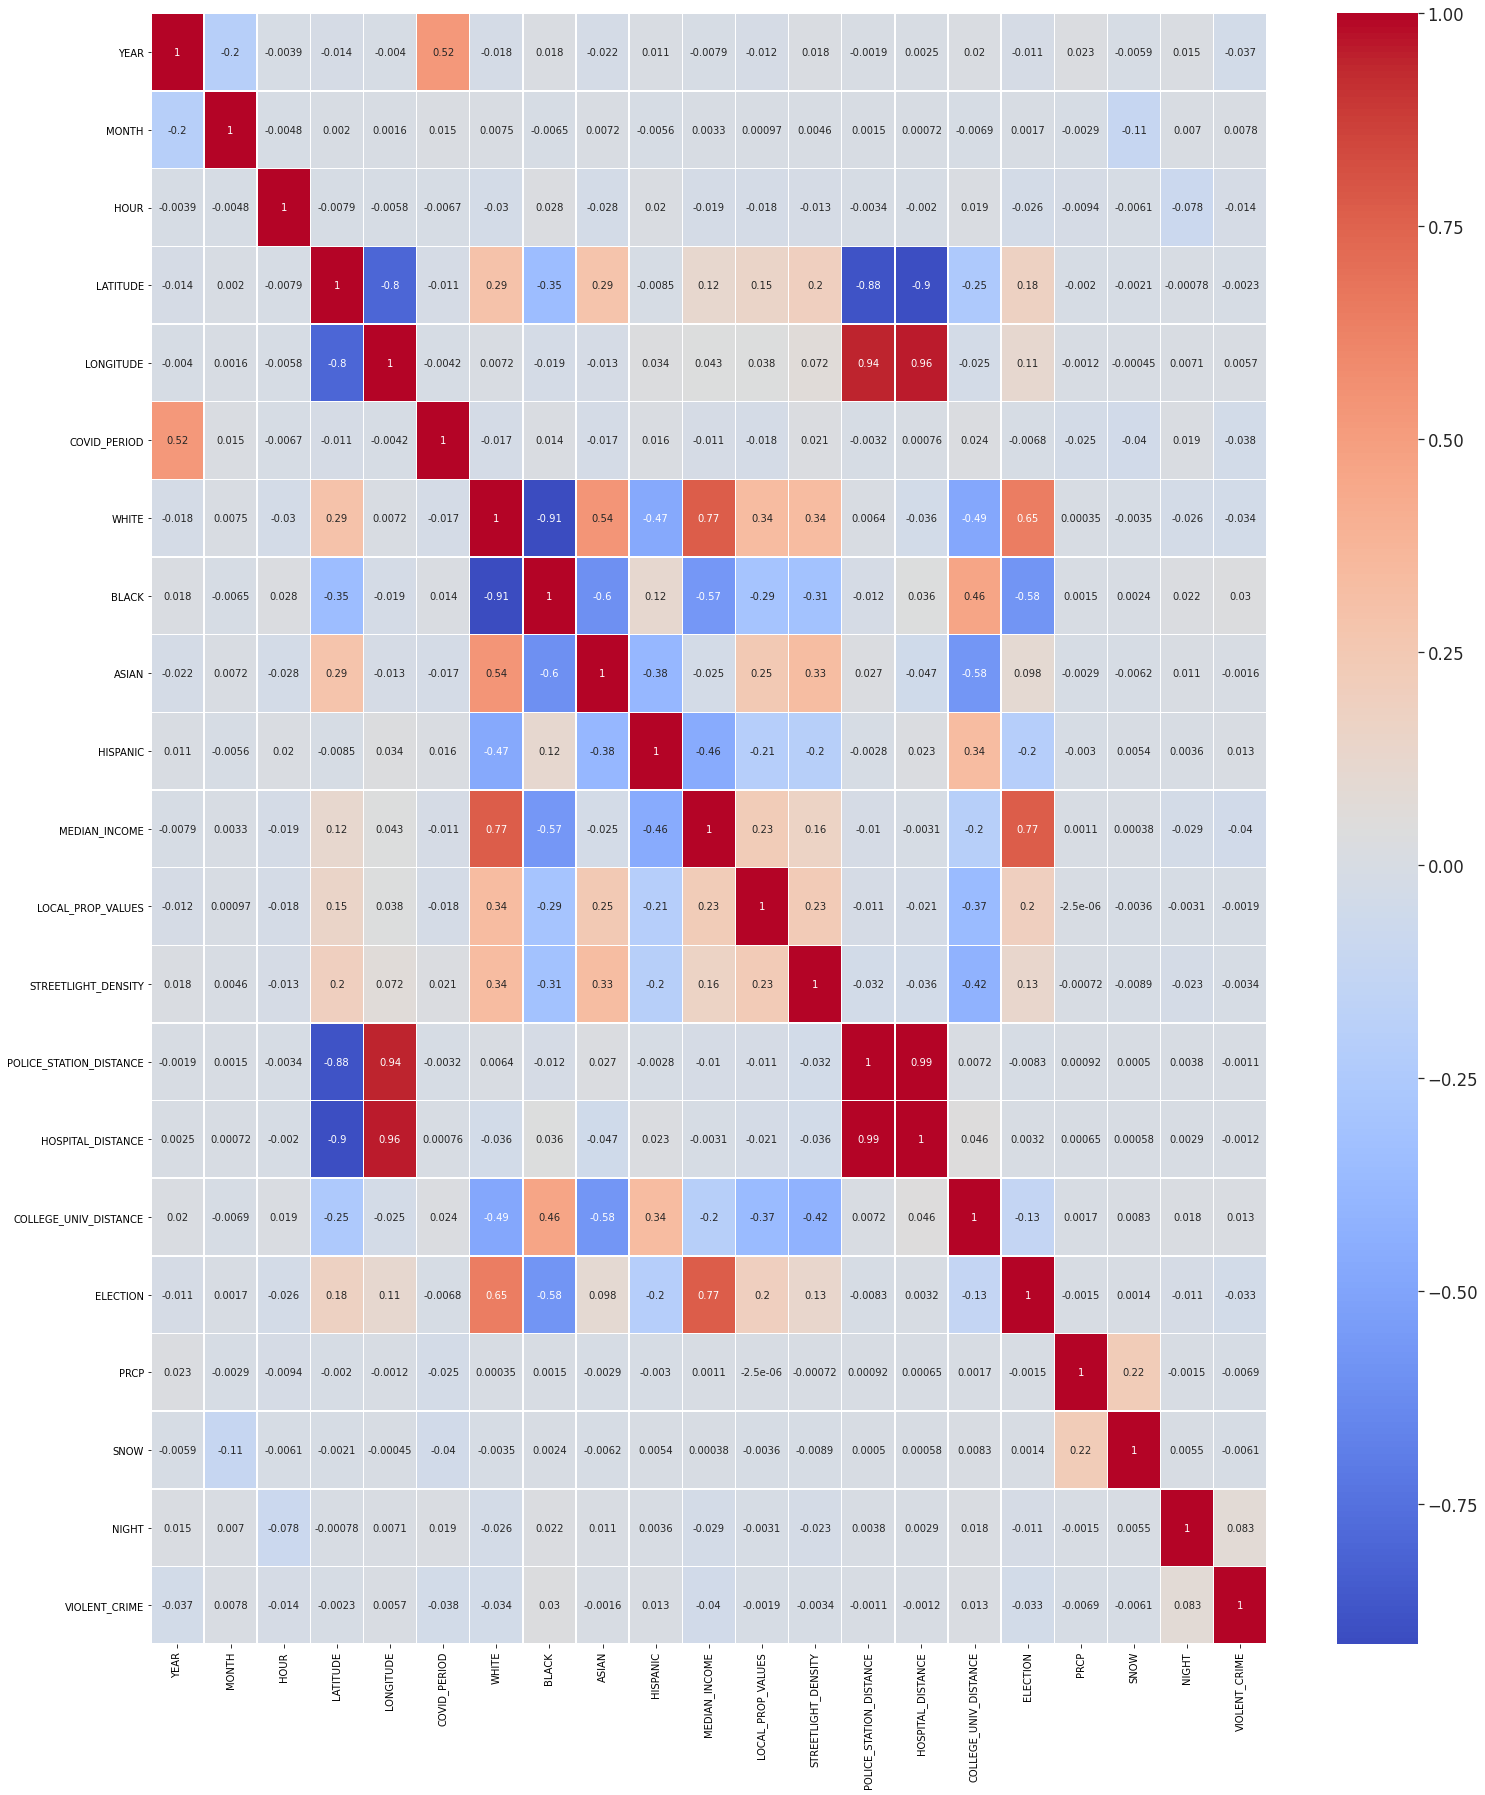

In [5]:
boston_corr = boston_crime_data_df.corr()
fig, ax = plt.subplots(figsize=(25,30)) 
sns.set(font_scale=1.5) 
ax = sns.heatmap(boston_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":10})

## **Boston Correlation Data with Offense Type Indicators**

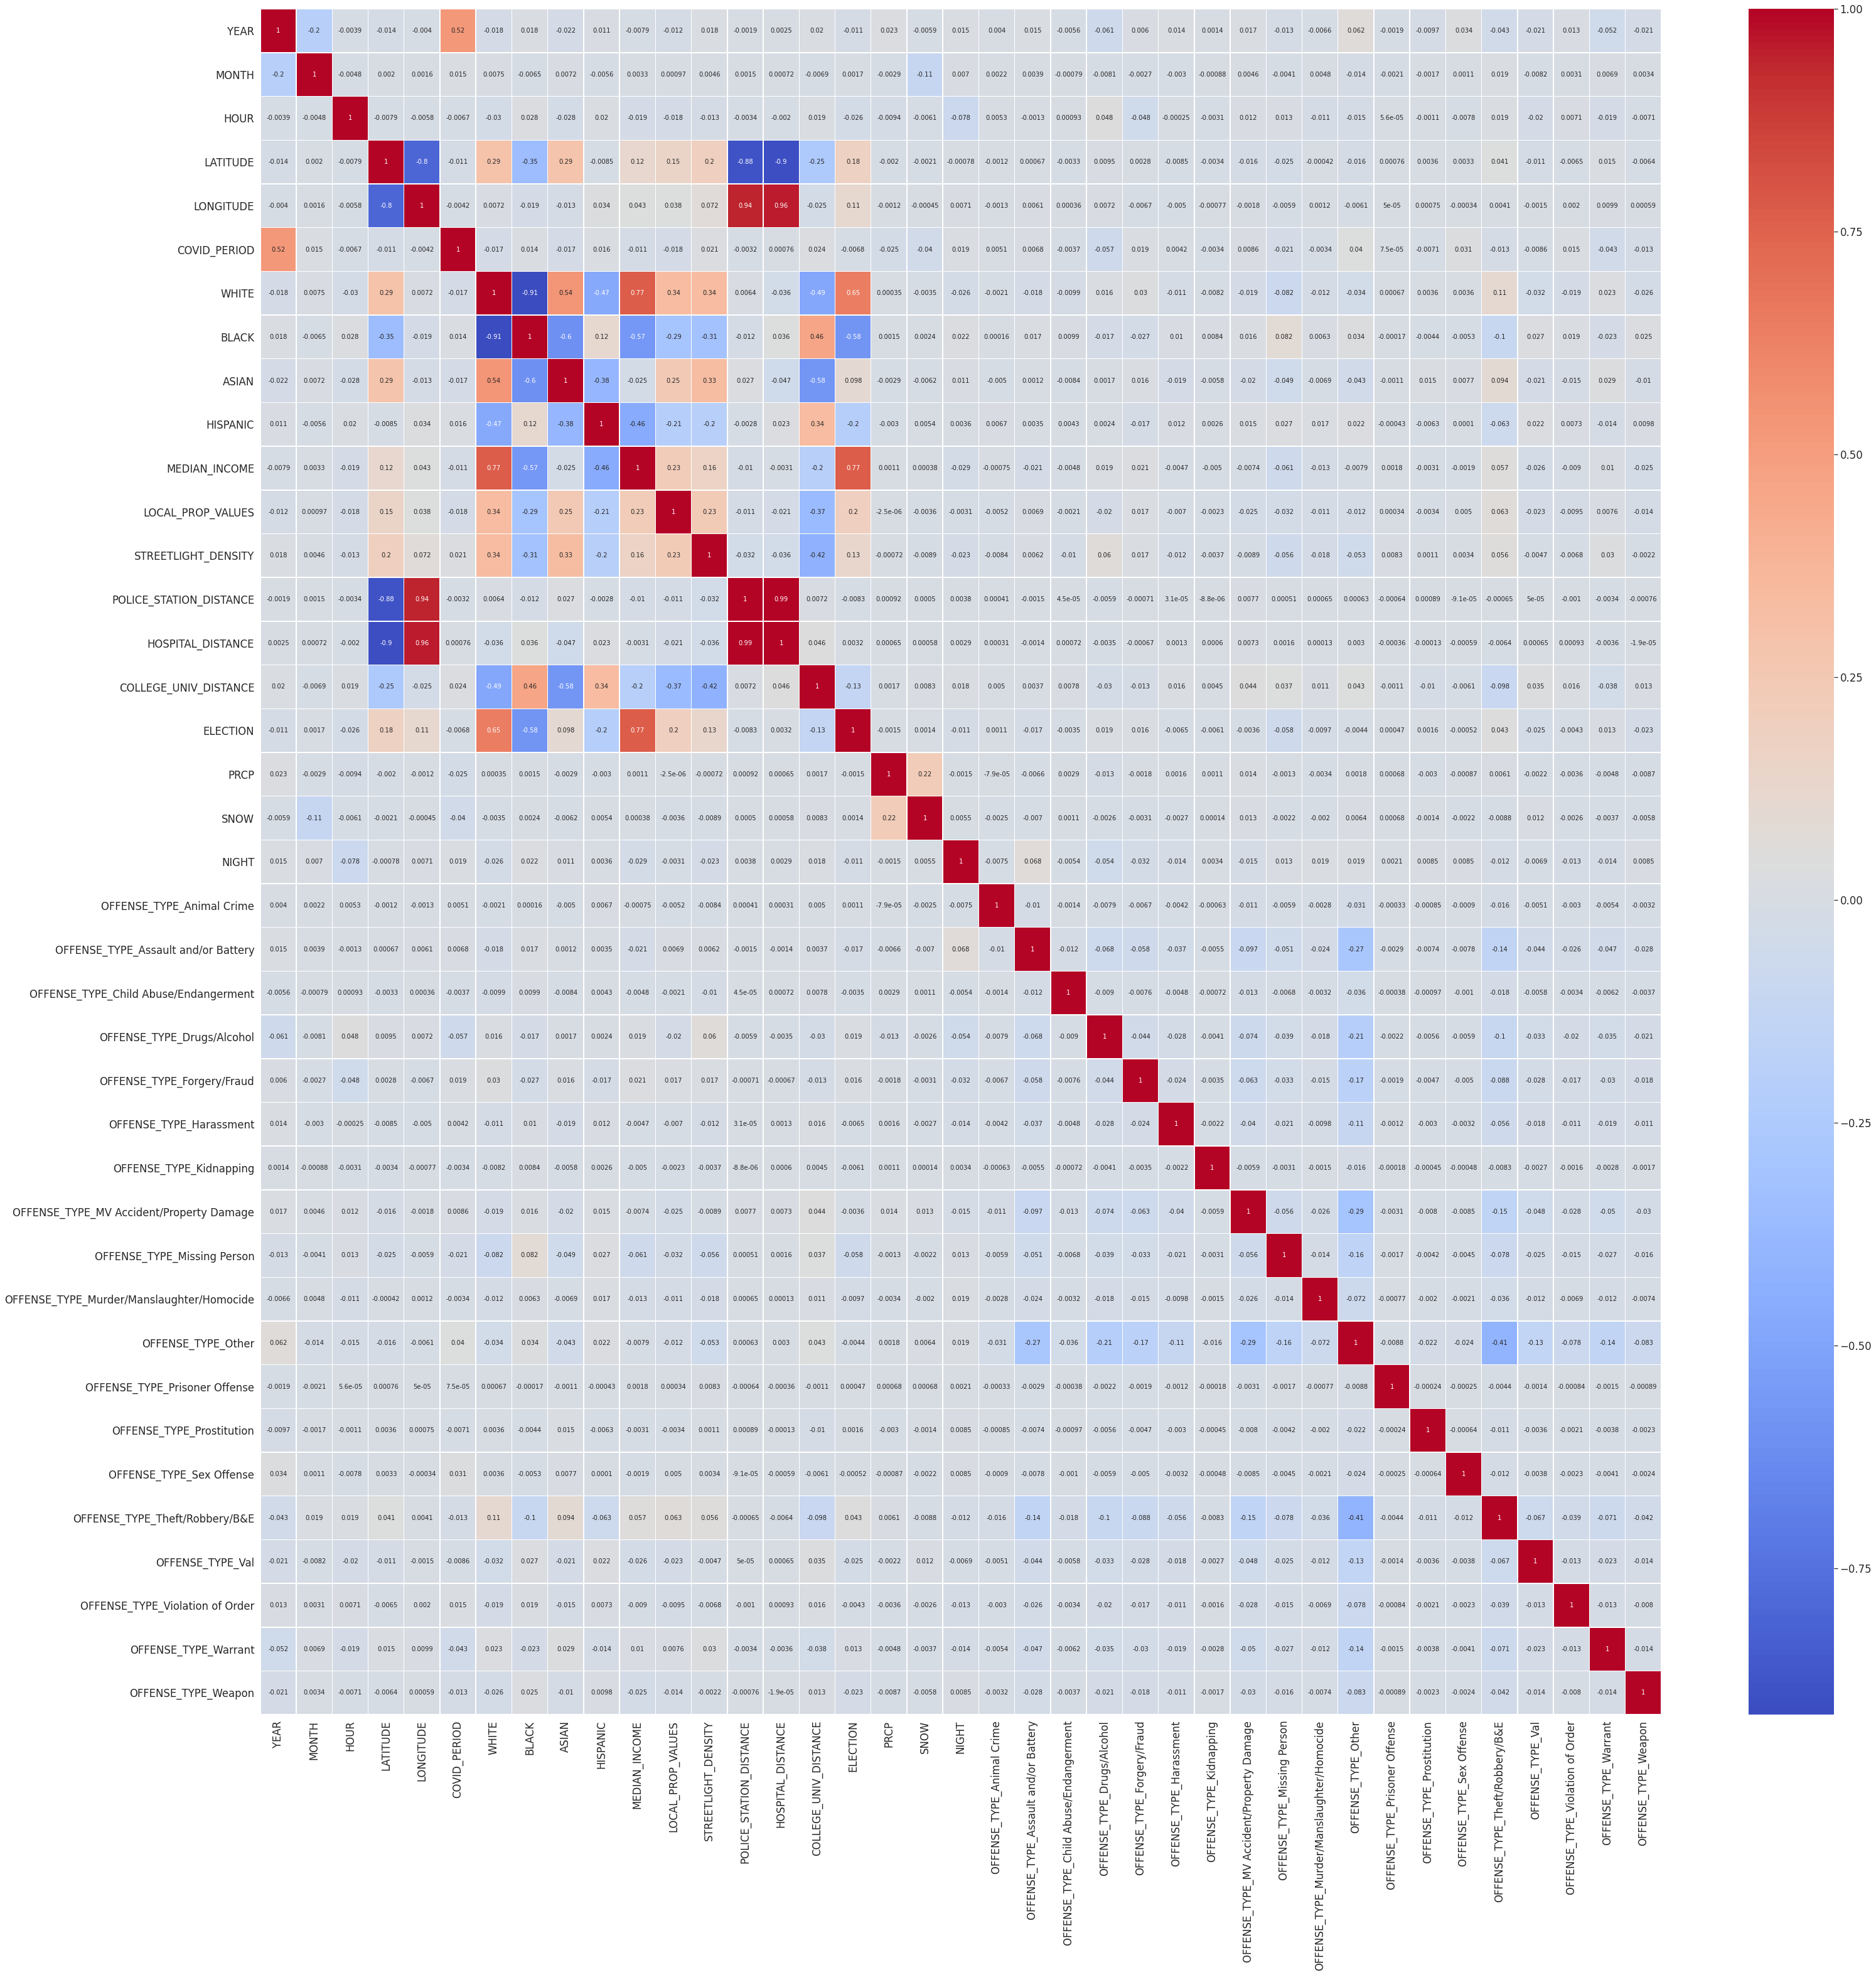

In [6]:
# Create one hot encoded types for offenses and perform correlation against features
demog_category_columns = ['OFFENSE_TYPE']
boston_crime_dummies_df = pd.get_dummies(boston_crime_data_df, columns=demog_category_columns)
boston_corr = boston_crime_dummies_df.drop(columns=['VIOLENT_CRIME']).corr()
fig, ax = plt.subplots(figsize=(50,50)) 
sns.set(font_scale=1.5)
ax = sns.heatmap(boston_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":10})

## **Boston Correlation Data with Offense Type Indicators (Focus Areas)**

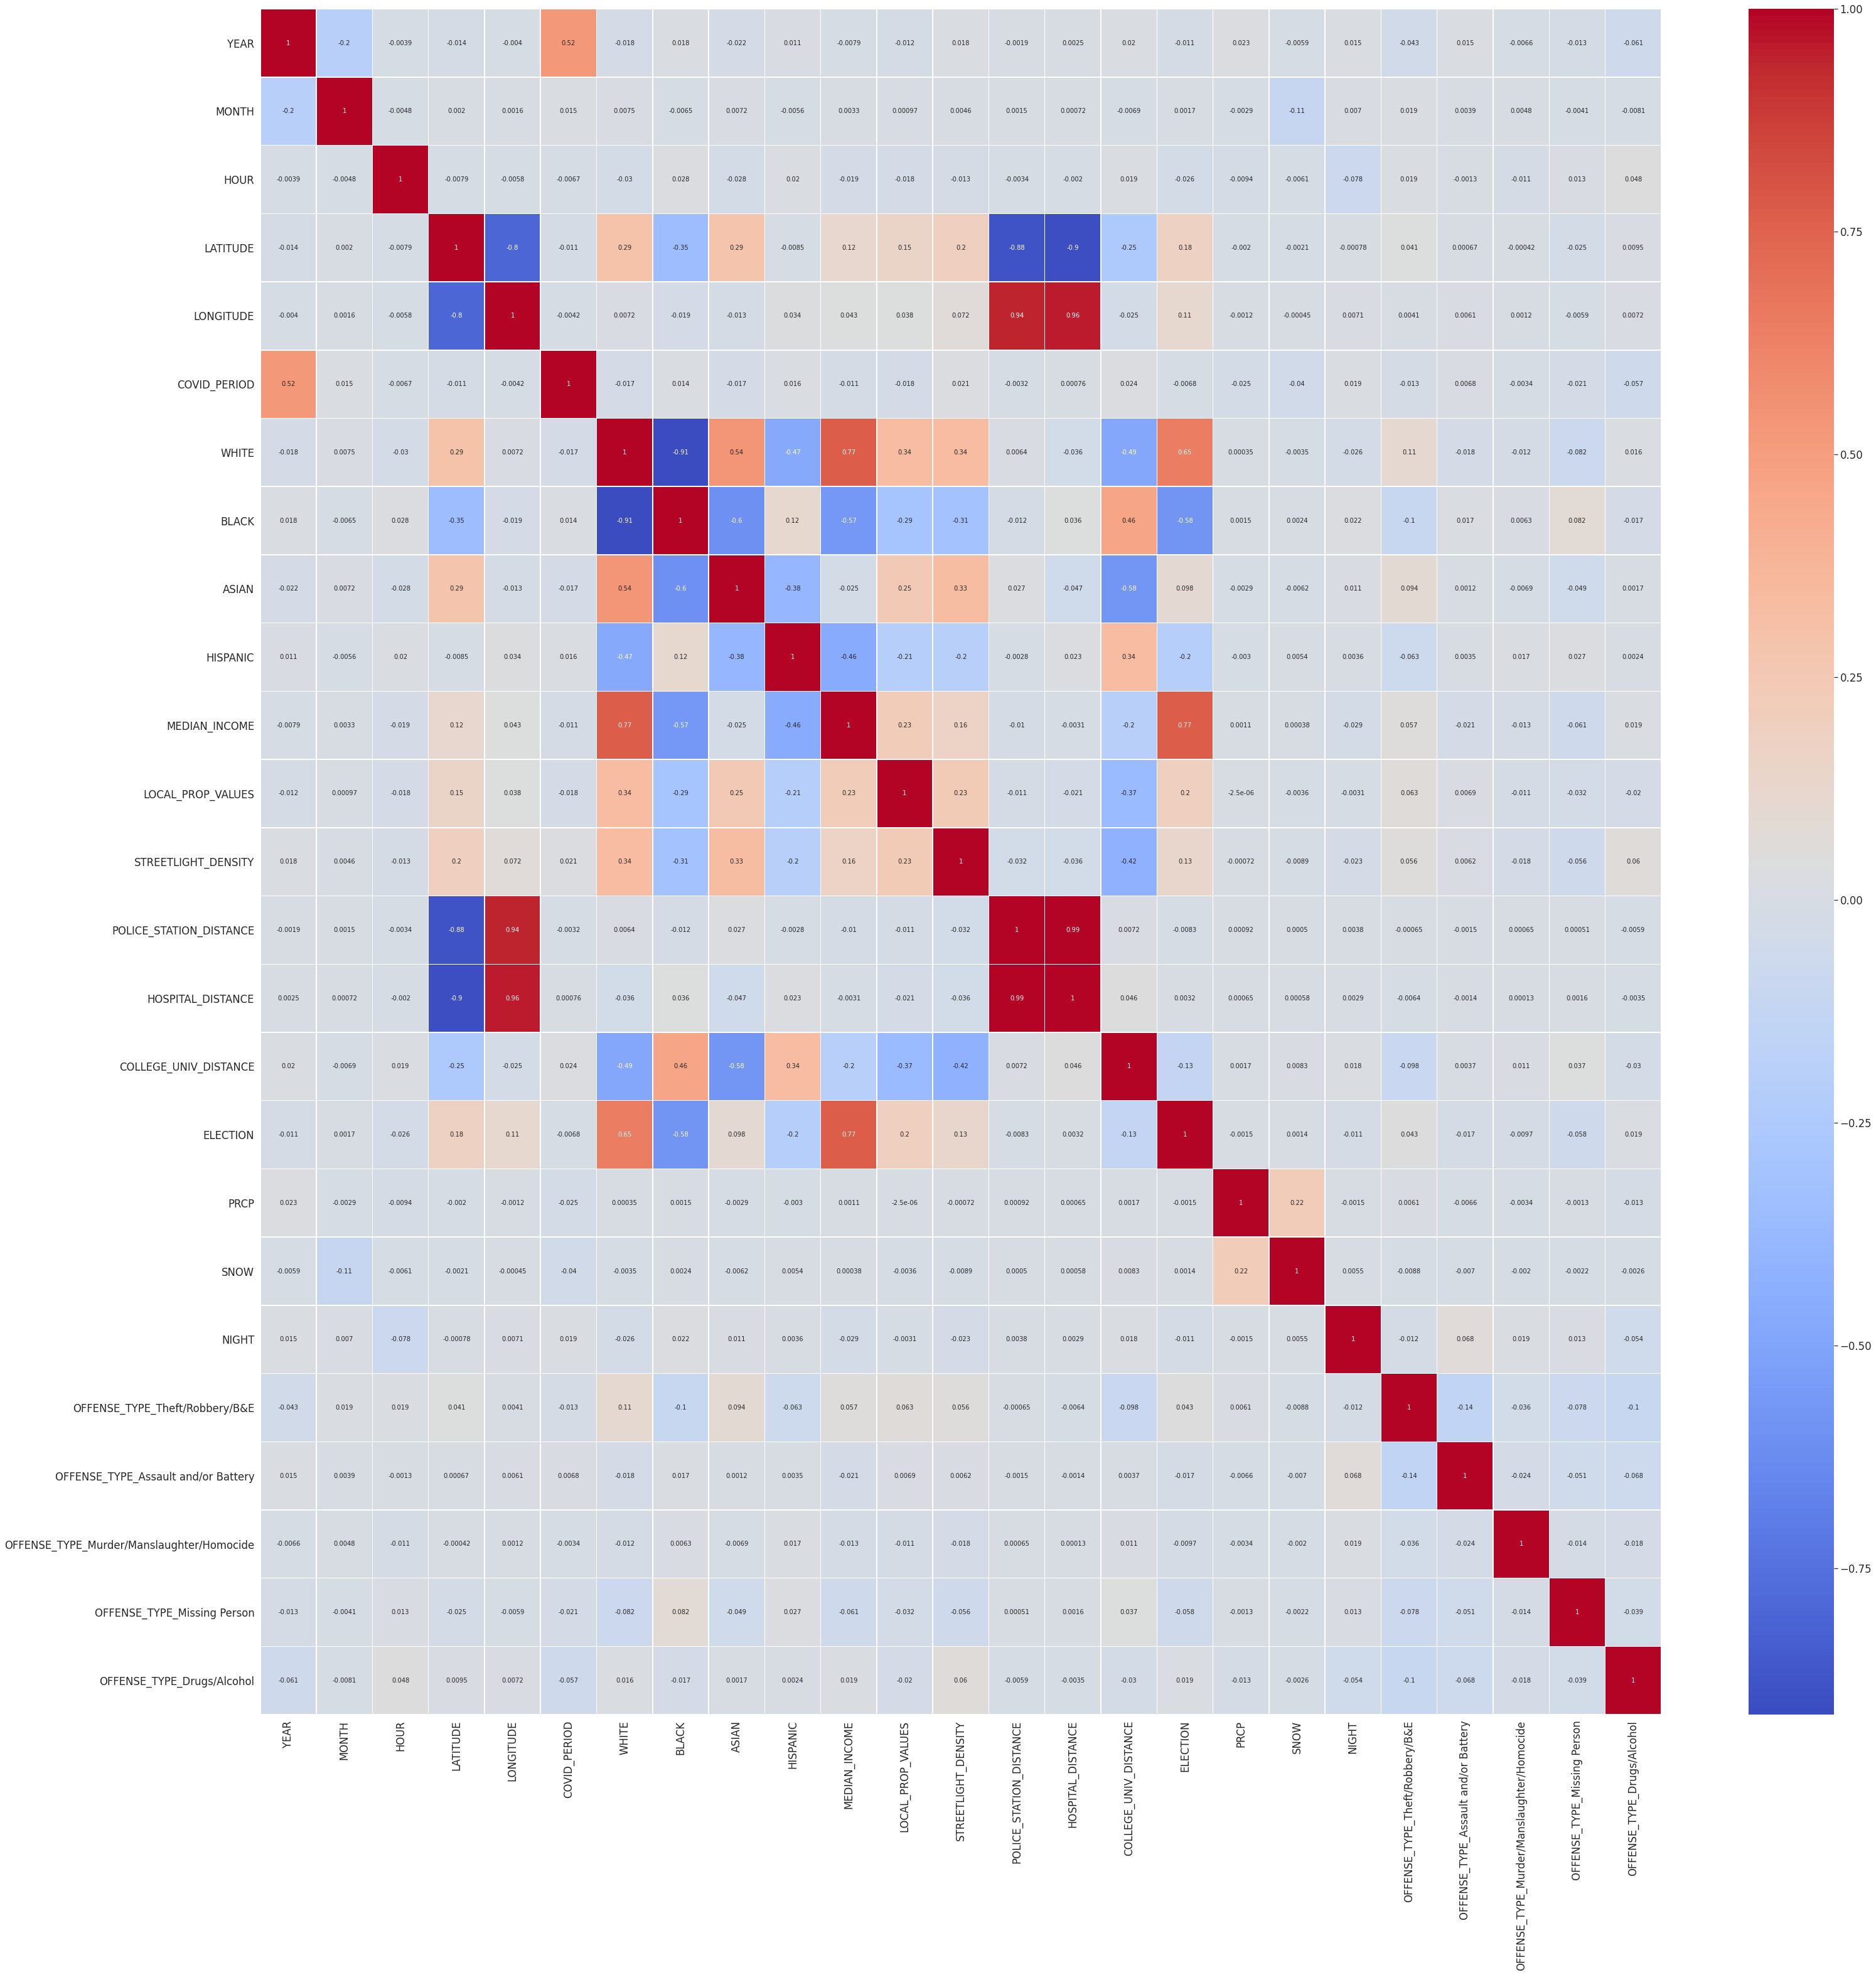

In [7]:
# Isolated areas of interest for correlation review
demog_category_columns = ['OFFENSE_TYPE']
boston_crime_dummies_df = pd.get_dummies(boston_crime_data_df, columns=demog_category_columns)
filter_columns = ['AREA', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'LATITUDE', 'LONGITUDE',
       'GEOHASH', 'COVID_PERIOD', 'WHITE', 'BLACK', 'ASIAN', 'HISPANIC',
       'MEDIAN_INCOME', 'LOCAL_PROP_VALUES', 'STREETLIGHT_DENSITY',
       'POLICE_STATION_DISTANCE', 'HOSPITAL_DISTANCE', 'COLLEGE_UNIV_DISTANCE',
       'ELECTION', 'PRCP', 'SNOW', 'NIGHT', 'OFFENSE_TYPE_Theft/Robbery/B&E','OFFENSE_TYPE_Assault and/or Battery','OFFENSE_TYPE_Murder/Manslaughter/Homocide','OFFENSE_TYPE_Missing Person', 'OFFENSE_TYPE_Drugs/Alcohol']

boston_corr = boston_crime_dummies_df.drop(columns=['VIOLENT_CRIME'])[filter_columns].corr()
fig, ax = plt.subplots(figsize=(50,50)) 
sns.set(font_scale=1.5)
ax = sns.heatmap(boston_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":10})

## **Boston Correlation Data with Offense Type Indicators - (Hour of Day)**

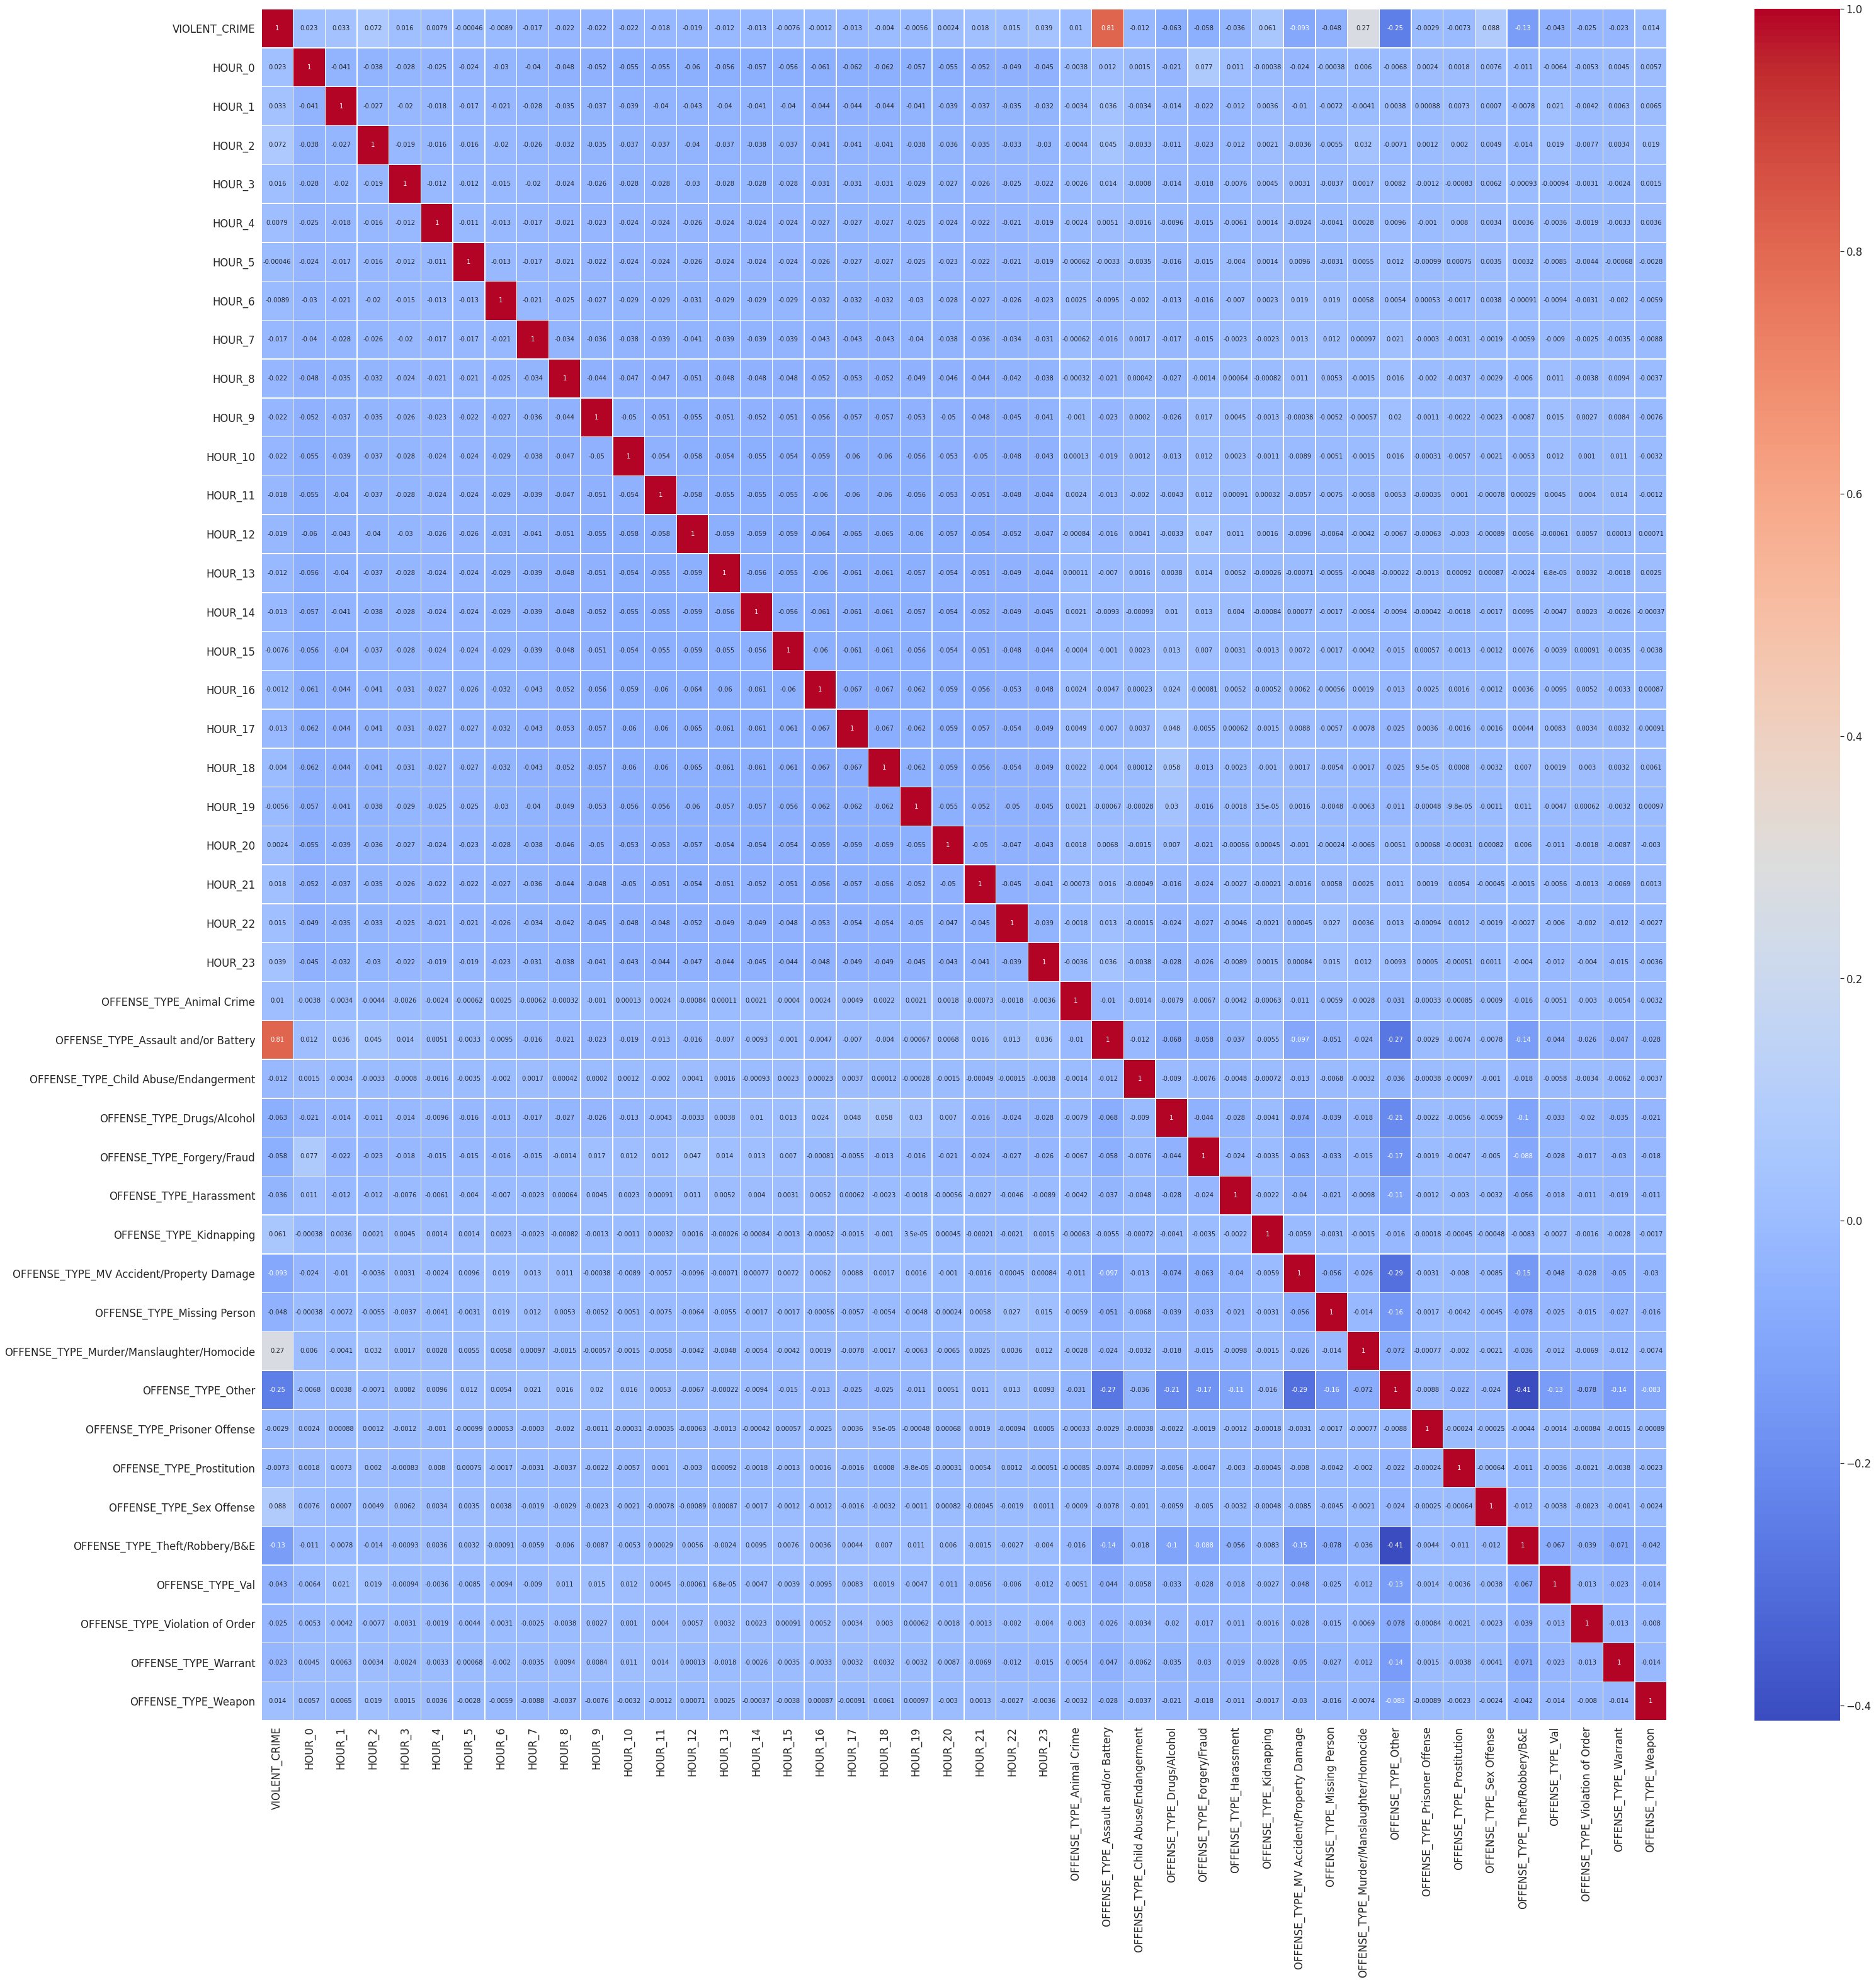

In [8]:
#Focus on Hour of Day
demog_category_columns = ["HOUR","OFFENSE_TYPE"]
boston_hour_day_df = boston_crime_data_df[["HOUR","VIOLENT_CRIME","OFFENSE_TYPE"]]
boston_hour_day_dummies_df = pd.get_dummies(boston_hour_day_df, columns=demog_category_columns)
boston_hour_day_corr = boston_hour_day_dummies_df.corr()
fig, ax = plt.subplots(figsize=(50,50)) 
sns.set(font_scale=1.5)
ax = sns.heatmap(boston_hour_day_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":10})

## **Boston Correlation Data with Offense Type Indicators - (Day of Week)**

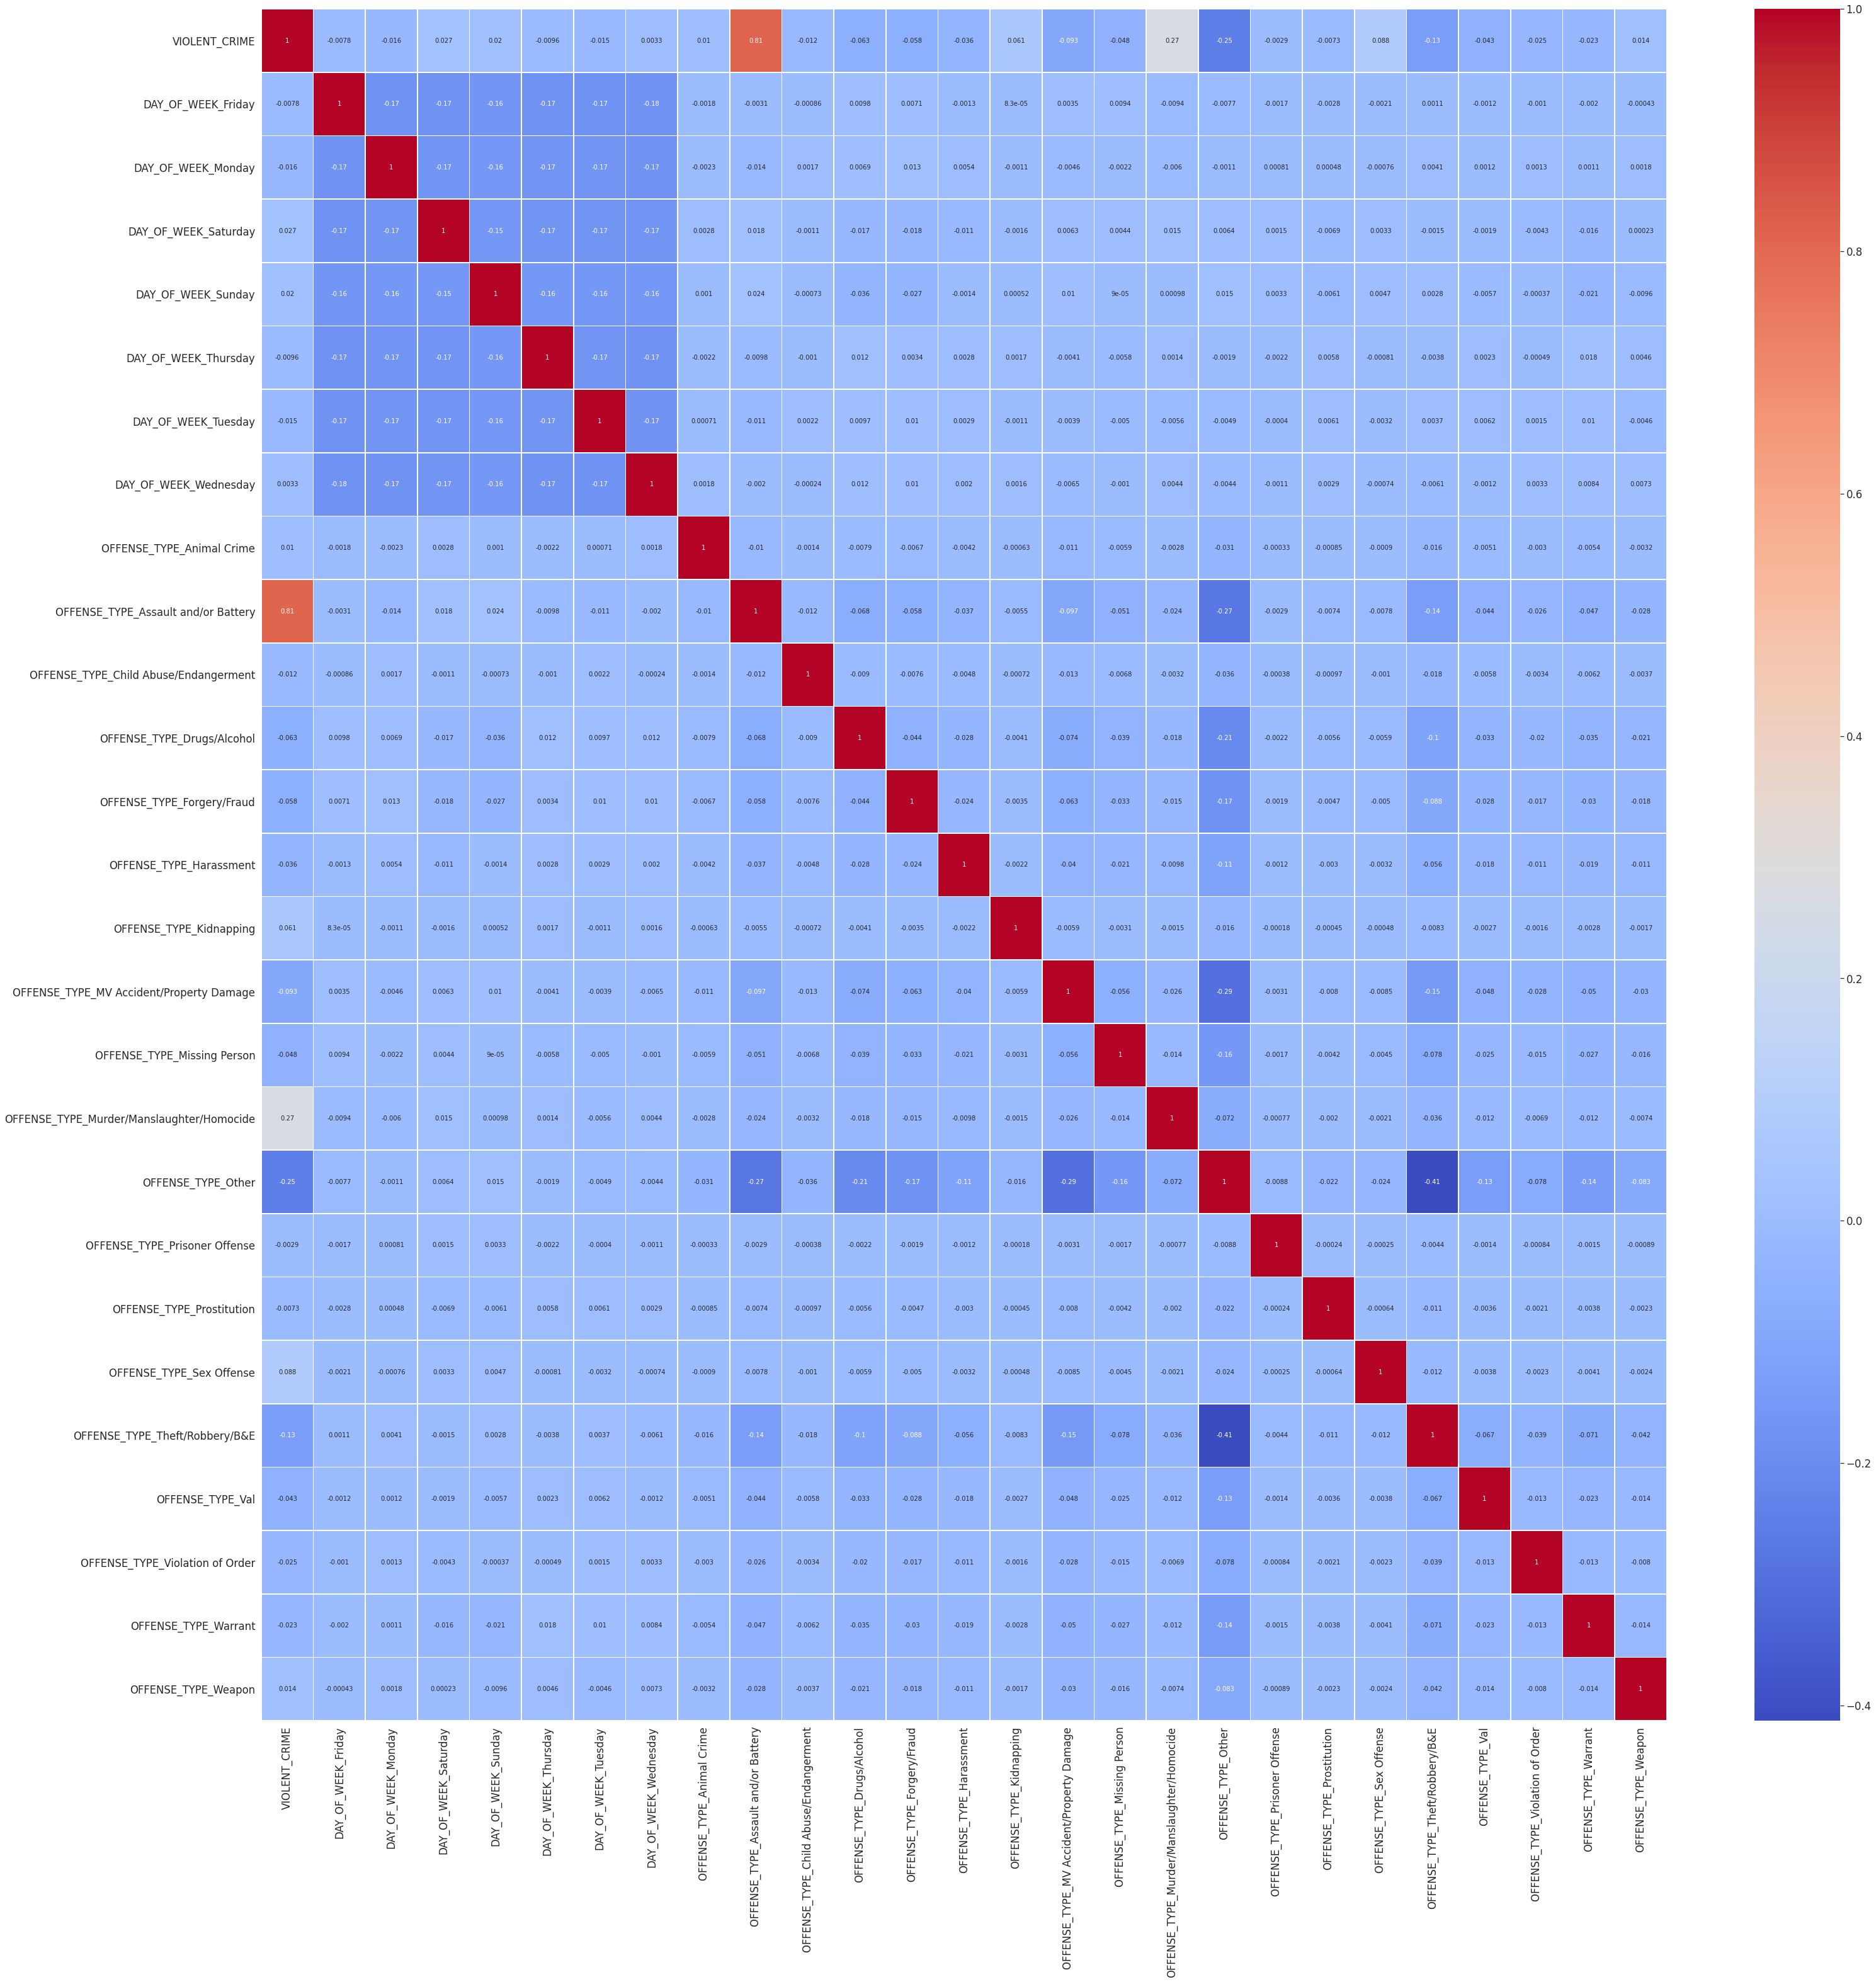

In [9]:
#Focus on Day of Week for Violent Crime 
demog_category_columns = ["DAY_OF_WEEK","OFFENSE_TYPE"]
boston_hour_day_df = boston_crime_data_df[["DAY_OF_WEEK","OFFENSE_TYPE","VIOLENT_CRIME"]]
boston_hour_day_dummies_df = pd.get_dummies(boston_hour_day_df, columns=demog_category_columns)
boston_hour_day_corr = boston_hour_day_dummies_df.corr()
fig, ax = plt.subplots(figsize=(50,50)) 
sns.set(font_scale=1.5)
ax = sns.heatmap(boston_hour_day_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":10})

## **Combined Boston/NYC Correlation Data with Violent Crime Indicator**


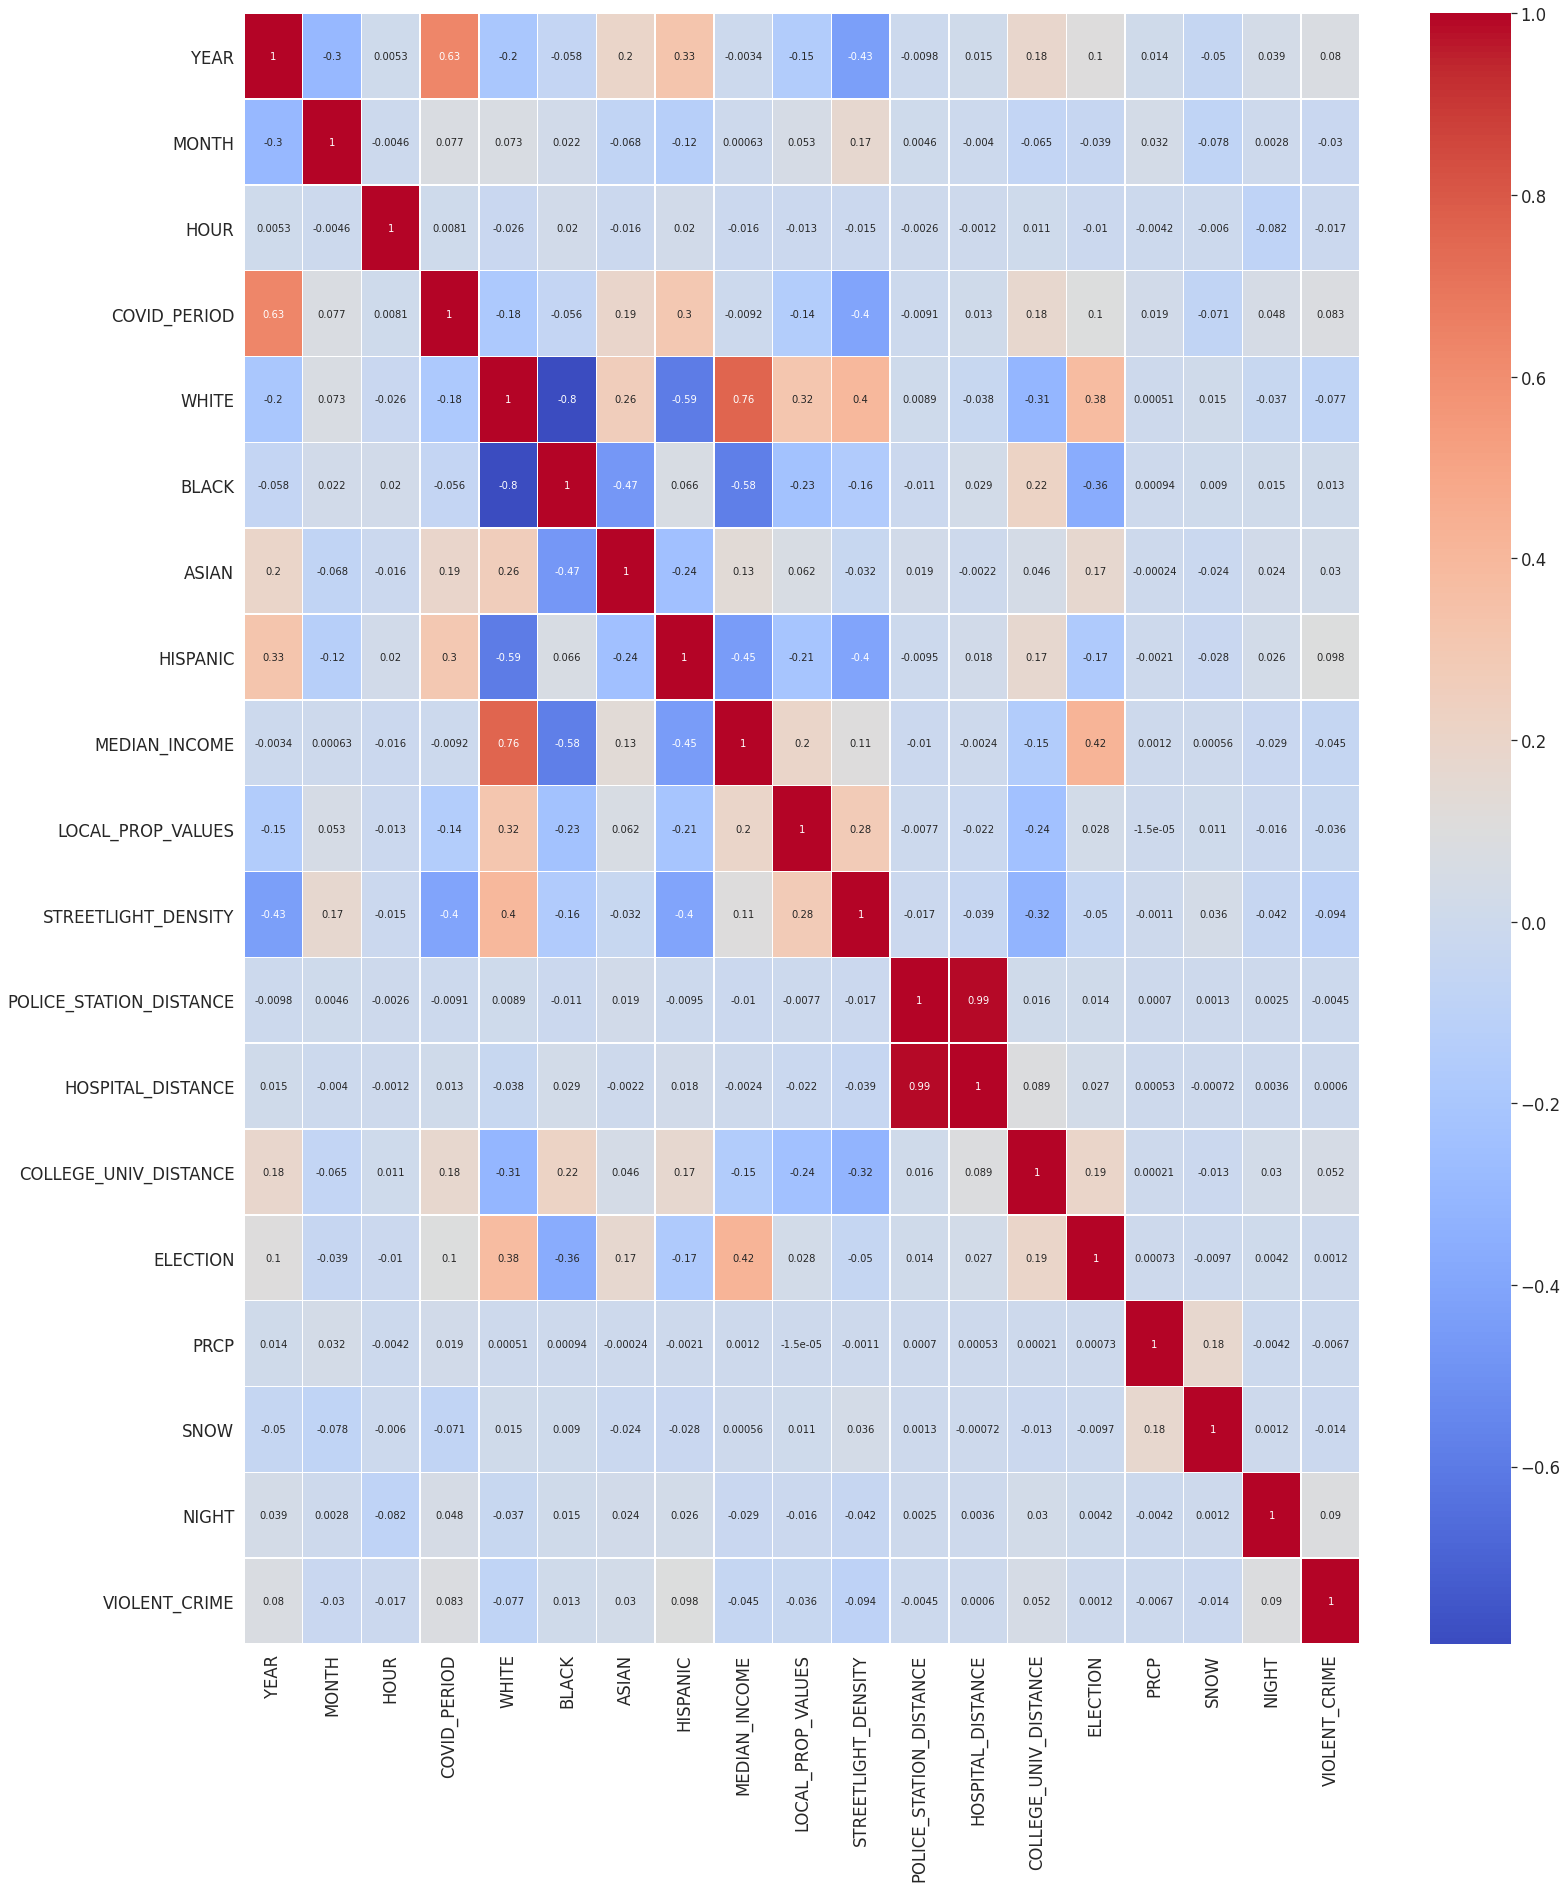

In [10]:
comb_corr = combined_crime_data_df.drop(columns=["AREA","LATITUDE","LONGITUDE"]).corr()
fig, ax = plt.subplots(figsize=(25,30)) 
sns.set(font_scale=1.5)
ax = sns.heatmap(comb_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":10})

## **Combined Boston/NYC Correlation Data with Offense Type Indicators**

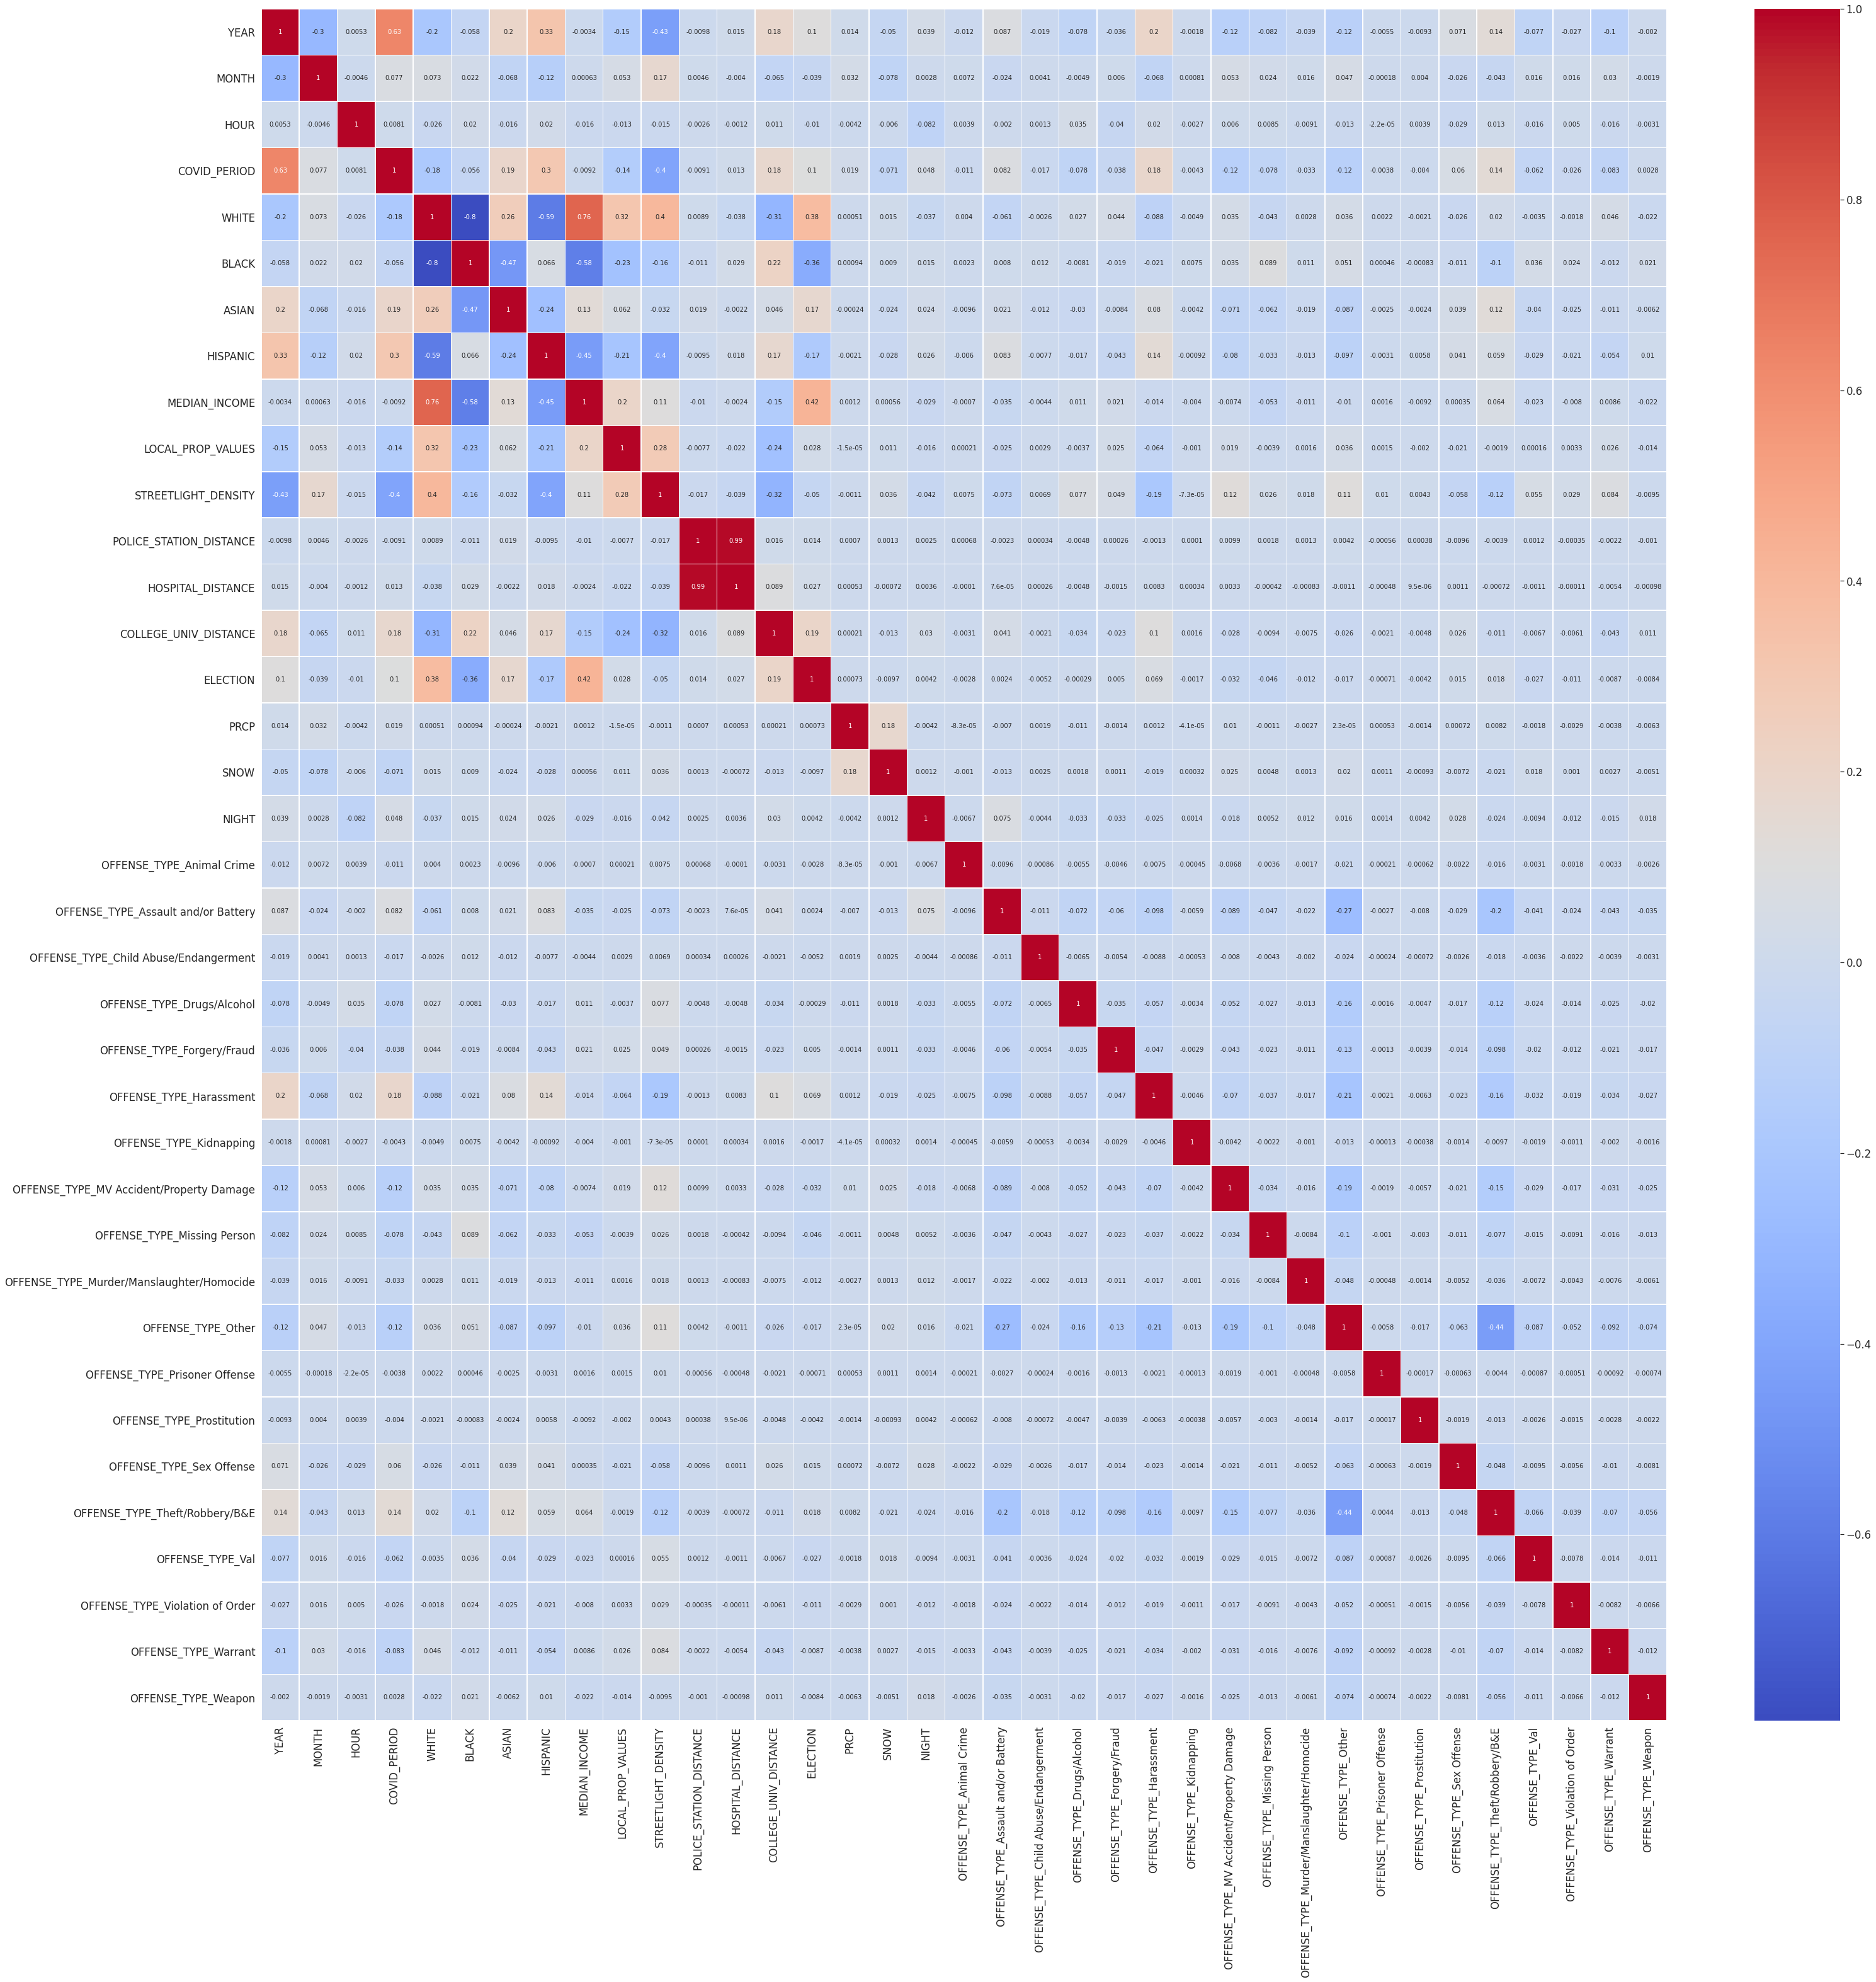

In [11]:
demog_category_columns = ['OFFENSE_TYPE']
combined_crime_dummies_df = pd.get_dummies(combined_crime_data_df, columns=demog_category_columns)
#dropping year since there is only one value for it
comb_corr = combined_crime_dummies_df.drop(columns=["VIOLENT_CRIME","AREA","LATITUDE","LONGITUDE"]).corr()
fig, ax = plt.subplots(figsize=(50,50)) 
sns.set(font_scale=1.5)
ax = sns.heatmap(comb_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":10})

## **Combined Boston/NYC Correlation Data with Offense Type Indicators (Focus Areas)**

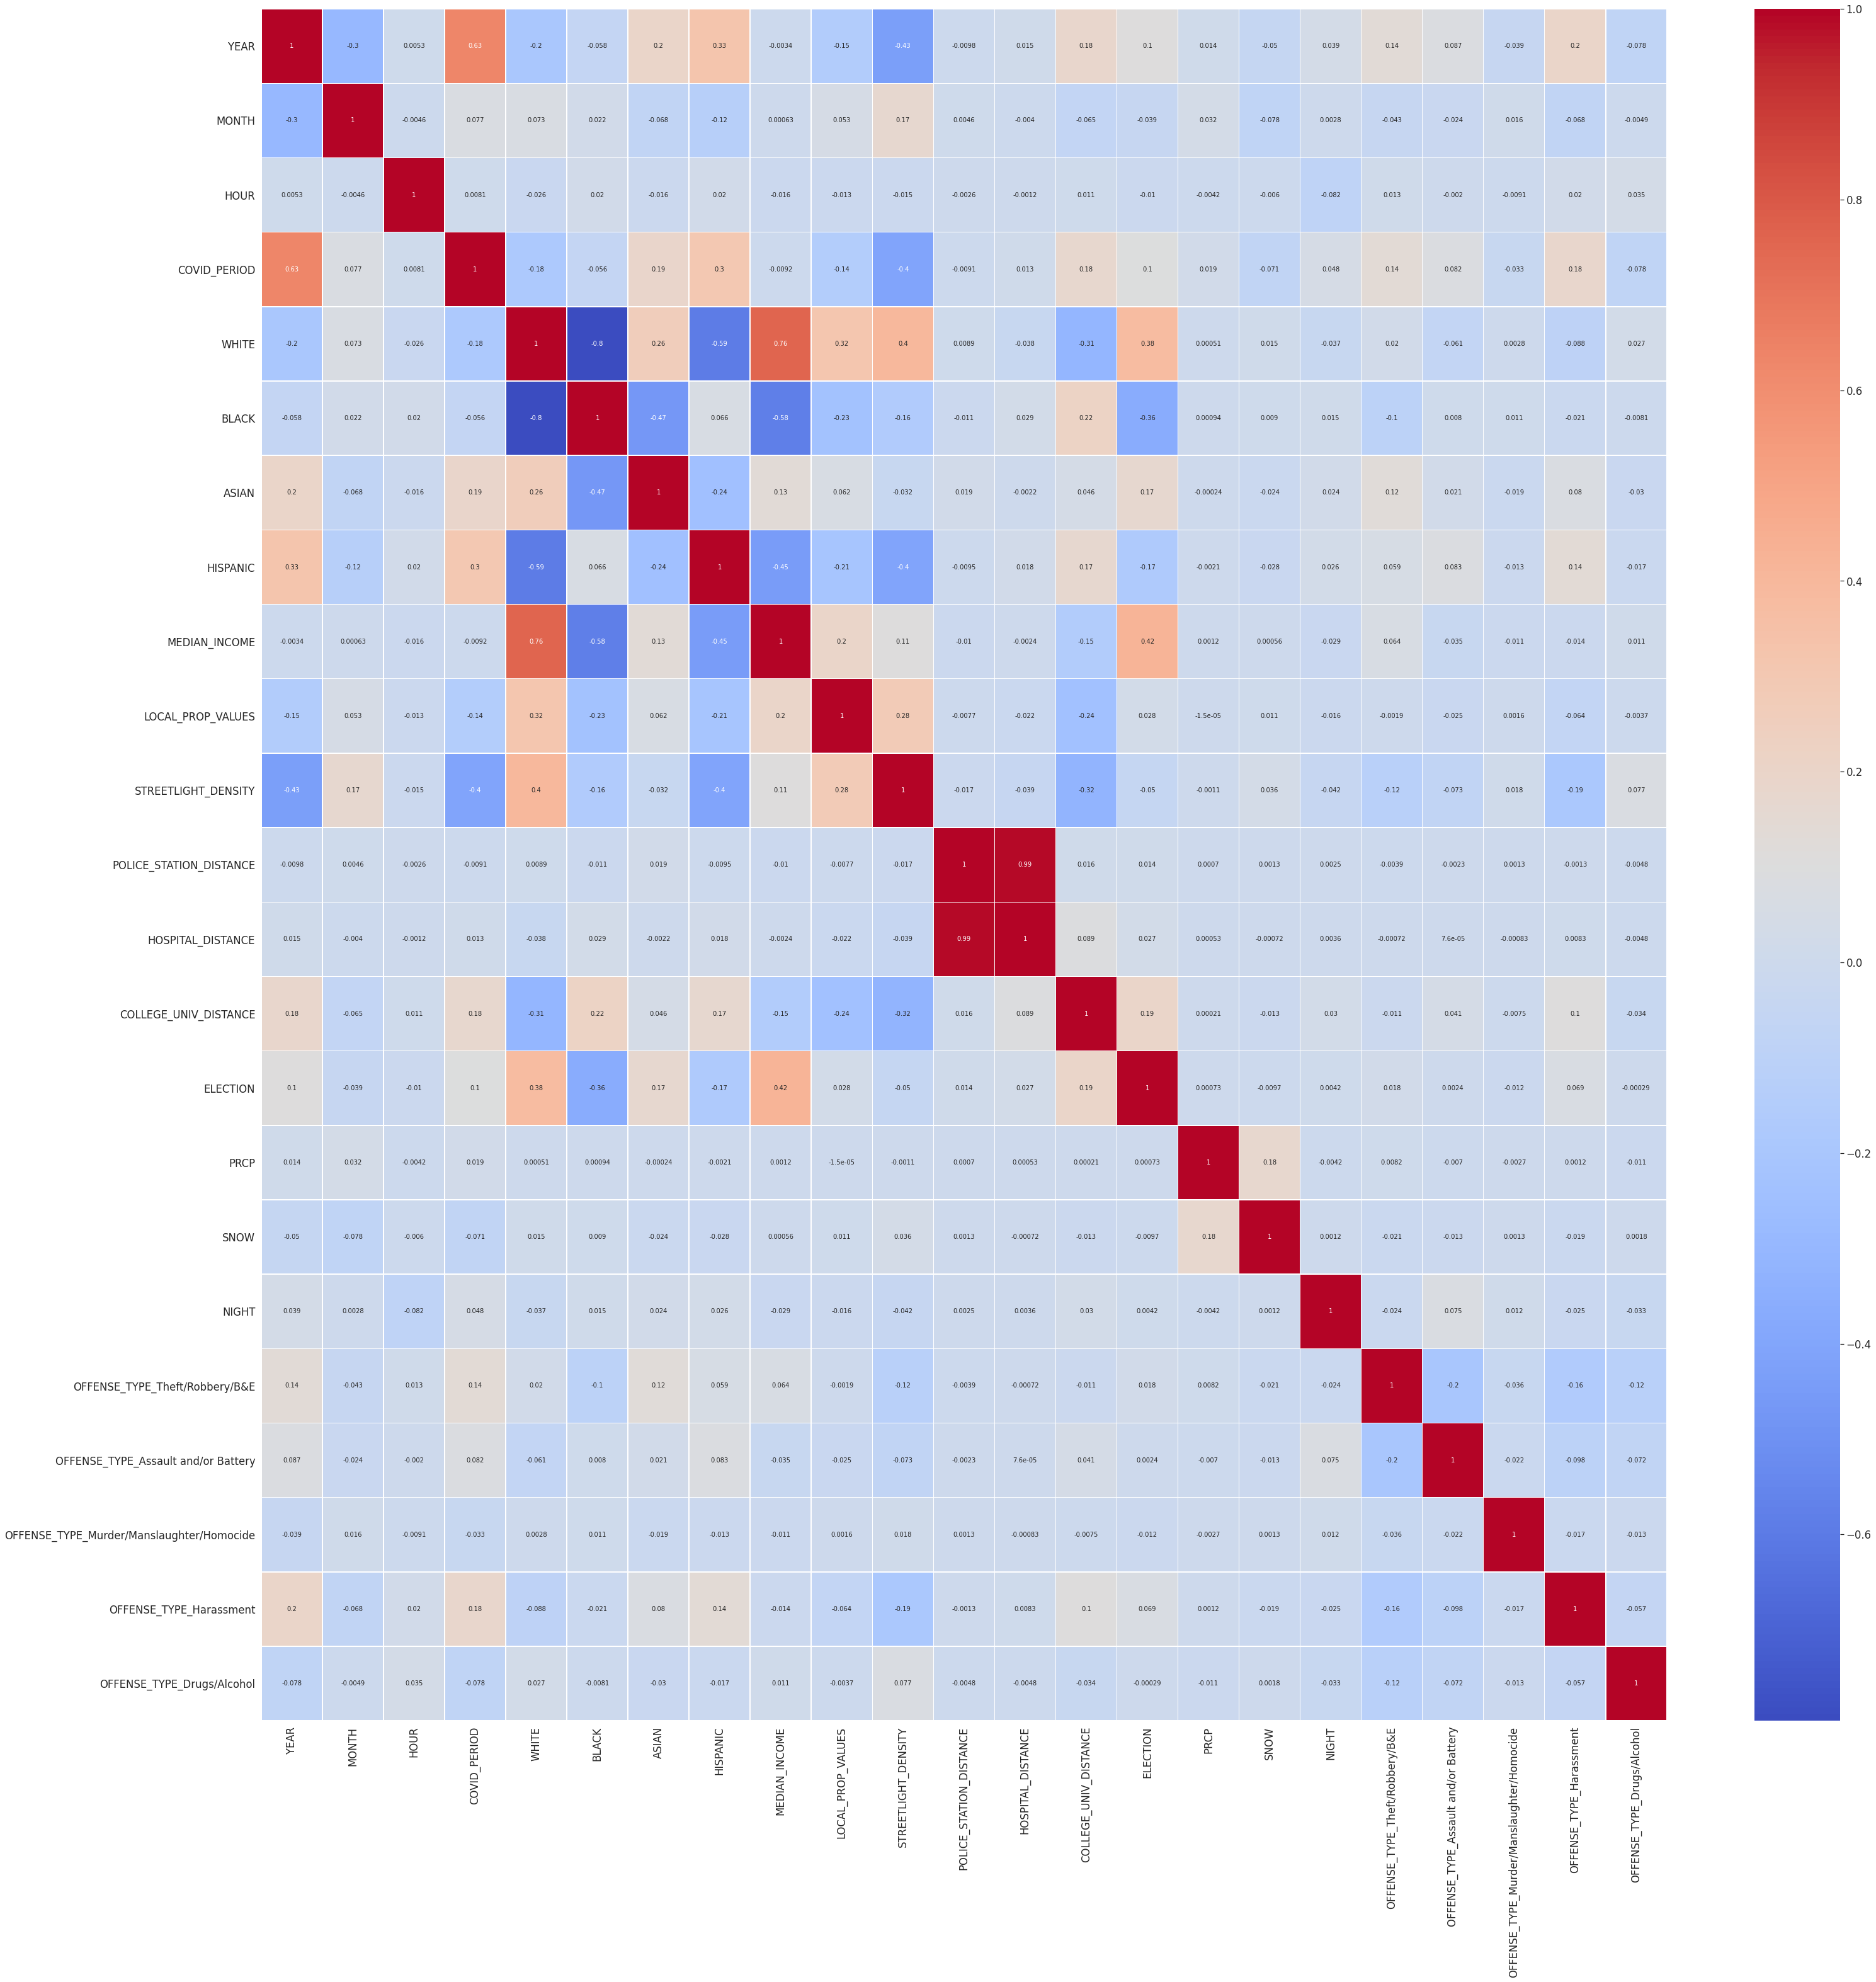

In [12]:
demog_category_columns = ['OFFENSE_TYPE']
combined_crime_dummies_df = pd.get_dummies(combined_crime_data_df, columns=demog_category_columns)
filter_columns = ['YEAR','MONTH', 'DAY_OF_WEEK', 'HOUR', 'COVID_PERIOD', 'WHITE', 'BLACK', 'ASIAN', 'HISPANIC',
       'MEDIAN_INCOME', 'LOCAL_PROP_VALUES', 'STREETLIGHT_DENSITY',
       'POLICE_STATION_DISTANCE', 'HOSPITAL_DISTANCE', 'COLLEGE_UNIV_DISTANCE',
       'ELECTION', 'PRCP', 'SNOW', 'NIGHT', 'OFFENSE_TYPE_Theft/Robbery/B&E','OFFENSE_TYPE_Assault and/or Battery','OFFENSE_TYPE_Murder/Manslaughter/Homocide','OFFENSE_TYPE_Harassment', 'OFFENSE_TYPE_Drugs/Alcohol']
#dropping year since there is only one value for it
comb_corr = combined_crime_dummies_df.drop(columns=["VIOLENT_CRIME"])[filter_columns].corr()
fig, ax = plt.subplots(figsize=(50,50)) 
sns.set(font_scale=1.5)
ax = sns.heatmap(comb_corr, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":10})

## **Baseline Models for Predicting Violent Crime**


In [13]:
from sklearn.model_selection import train_test_split
random_state = 109

boston_crime_train, boston_crime_test = train_test_split(boston_crime_data_df, train_size=.8, random_state = random_state)

train_offenses = boston_crime_train['VIOLENT_CRIME'].count()
train_violent_crime = boston_crime_train[boston_crime_train["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
train_proportion_violent = round(train_violent_crime/train_offenses, 3)
train_accuracy = round(1 - train_proportion_violent,3)

test_offenses = boston_crime_test['VIOLENT_CRIME'].count()
test_violent_crime = boston_crime_test[boston_crime_test["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
test_proportion_violent = round(test_violent_crime/test_offenses, 3)
test_accuracy = round(1 - test_proportion_violent,3)

print(f"Proportion of violent crime (Boston): {train_proportion_violent}")
print(f"Naive Model Train Accuracy when classifying all offenses as not violent: {train_accuracy}")
print(f"Naive Model Test Accuracy when classifying all offenses as not violent: {test_accuracy}")


Proportion of violent crime (Boston): 0.082
Naive Model Train Accuracy when classifying all offenses as not violent: 0.918
Naive Model Test Accuracy when classifying all offenses as not violent: 0.918


In [14]:
nyc_crime_train, nyc_crime_test = train_test_split(new_york_crime_data_df, train_size=.8, random_state = random_state)

train_offenses = nyc_crime_train['VIOLENT_CRIME'].count()
train_violent_crime = nyc_crime_train[nyc_crime_train["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
train_proportion_violent = round(train_violent_crime/train_offenses, 3)
train_accuracy = round(1 - train_proportion_violent,3)

test_offenses = nyc_crime_test['VIOLENT_CRIME'].count()
test_violent_crime = nyc_crime_test[nyc_crime_test["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
test_proportion_violent = round(test_violent_crime/test_offenses, 3)
test_accuracy = round(1 - test_proportion_violent,3)

print(f"Proportion of violent crime (NYC) : {train_proportion_violent}")
print(f"Naive Model Train Accuracy when classifying all offenses as not violent: {train_accuracy}")
print(f"Naive Model Test Accuracy when classifying all offenses as not violent: {test_accuracy}")

Proportion of violent crime (NYC) : 0.176
Naive Model Train Accuracy when classifying all offenses as not violent: 0.824
Naive Model Test Accuracy when classifying all offenses as not violent: 0.824


In [15]:
comb_crime_train, comb_crime_test = train_test_split(combined_crime_data_df, train_size=.8, random_state = random_state)
train_offenses = comb_crime_train['VIOLENT_CRIME'].count()
train_violent_crime = comb_crime_train[comb_crime_train["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
train_proportion_violent = round(train_violent_crime/train_offenses, 3)
train_accuracy = round(1 - train_proportion_violent,3)

test_offenses = comb_crime_test['VIOLENT_CRIME'].count()
test_violent_crime = comb_crime_test[comb_crime_test["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
test_proportion_violent = round(test_violent_crime/test_offenses, 3)
test_accuracy = round(1 - test_proportion_violent,3)

print(f"Proportion of violent crime (Combined) : {train_proportion_violent}")
print(f"Naive Model Train Accuracy when classifying all offenses as not violent: {train_accuracy}")
print(f"Naive Model Test Accuracy when classifying all offenses as not violent: {test_accuracy}")

Proportion of violent crime (Combined) : 0.118
Naive Model Train Accuracy when classifying all offenses as not violent: 0.882
Naive Model Test Accuracy when classifying all offenses as not violent: 0.882


# **Violent Crime Prediction/Inference - Boston Data**

## **Logistic Regression**



In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# we'll evaluate for violent crime in Boston using all features (minus the other response variable for Offense Type)
demog_category_columns = ['AREA', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']
train_crime_demog_dummies_df = pd.get_dummies(boston_crime_train.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)
test_crime_demog_dummies_df = pd.get_dummies(boston_crime_test.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)

# select all columns from dummies minus response and Geohash 
x_columns = train_crime_demog_dummies_df.drop(columns=["VIOLENT_CRIME","GEOHASH"]).columns
X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]

# normalize the columns
demog_scaler = MinMaxScaler()
demog_scaler.fit(X_train)
x_train_norm = demog_scaler.transform(X_train)
x_test_norm = demog_scaler.transform(X_test)

y_train = train_crime_demog_dummies_df['VIOLENT_CRIME'].values
y_test = test_crime_demog_dummies_df['VIOLENT_CRIME'].values

# attempt a baseline logistic regression without regularization
demog_logit_full = LogisticRegression(penalty='none', max_iter = 10000)
demog_logit_full.fit(x_train_norm,y_train)
demog_logit_full_train_accuracy = round(demog_logit_full.score(x_train_norm, y_train),3)
demog_logit_full_test_accuracy = round(demog_logit_full.score(x_test_norm, y_test),3)


In [17]:
# Print Baseline Logistic Regression Model
b0 = round(demog_logit_full.intercept_[0],3)
print(f"Logistic Regression Estimated Betas (B0): {b0}")

for i, k in enumerate(x_columns):
    print(f"Logistic Regression Estimated Beta {k} (B{i + 1}): { round(demog_logit_full.coef_[0][i],3)}")

print(f"\nLogisitic Train Accuracy: {demog_logit_full_train_accuracy}, Logistic Test Accuracy: {demog_logit_full_test_accuracy}")

Logistic Regression Estimated Betas (B0): -0.869
Logistic Regression Estimated Beta LATITUDE (B1): -0.868
Logistic Regression Estimated Beta LONGITUDE (B2): -0.009
Logistic Regression Estimated Beta COVID_PERIOD (B3): 0.099
Logistic Regression Estimated Beta WHITE (B4): -0.366
Logistic Regression Estimated Beta BLACK (B5): -0.334
Logistic Regression Estimated Beta ASIAN (B6): -0.161
Logistic Regression Estimated Beta HISPANIC (B7): -0.292
Logistic Regression Estimated Beta MEDIAN_INCOME (B8): -0.293
Logistic Regression Estimated Beta LOCAL_PROP_VALUES (B9): 0.056
Logistic Regression Estimated Beta STREETLIGHT_DENSITY (B10): -0.168
Logistic Regression Estimated Beta POLICE_STATION_DISTANCE (B11): -0.006
Logistic Regression Estimated Beta HOSPITAL_DISTANCE (B12): -0.01
Logistic Regression Estimated Beta COLLEGE_UNIV_DISTANCE (B13): 0.556
Logistic Regression Estimated Beta ELECTION (B14): -0.205
Logistic Regression Estimated Beta PRCP (B15): -0.193
Logistic Regression Estimated Beta SNOW 

## **Logistic Regression CV w/Ridge Regularization**


In [18]:
from sklearn.linear_model import LogisticRegressionCV
c_list = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
folds = 3
training_score = []

logit_ridge= LogisticRegressionCV(Cs=c_list, penalty='l2',solver='liblinear', max_iter = 1000, scoring='accuracy',cv=folds)
logit_ridge.fit(x_train_norm, y_train)
logit_ridge_score_train = logit_ridge.score(x_train_norm, y_train)
logit_ridge_score_test = logit_ridge.score(x_test_norm, y_test)


In [19]:
print(
    "The regularization parameter C chosen by this model: {}\n"
    "Training Accuracy: {:.3f}\n"
    "Test Accuracy: {:.3f}\n"
    .format(logit_ridge.C_[0], logit_ridge_score_train, logit_ridge_score_test)
)

The regularization parameter C chosen by this model: 0.001
Training Accuracy: 0.918
Test Accuracy: 0.918



In [20]:
for i, k in enumerate(x_columns):
    print(f"Logistic Regression w/Ridge Estimated Beta {k} (B{i + 1}): { round(logit_ridge.coef_[0][i],3)}")

Logistic Regression w/Ridge Estimated Beta LATITUDE (B1): -0.775
Logistic Regression w/Ridge Estimated Beta LONGITUDE (B2): -0.001
Logistic Regression w/Ridge Estimated Beta COVID_PERIOD (B3): -0.183
Logistic Regression w/Ridge Estimated Beta WHITE (B4): -0.354
Logistic Regression w/Ridge Estimated Beta BLACK (B5): -0.279
Logistic Regression w/Ridge Estimated Beta ASIAN (B6): -0.218
Logistic Regression w/Ridge Estimated Beta HISPANIC (B7): -0.23
Logistic Regression w/Ridge Estimated Beta MEDIAN_INCOME (B8): -0.286
Logistic Regression w/Ridge Estimated Beta LOCAL_PROP_VALUES (B9): -0.005
Logistic Regression w/Ridge Estimated Beta STREETLIGHT_DENSITY (B10): -0.109
Logistic Regression w/Ridge Estimated Beta POLICE_STATION_DISTANCE (B11): -0.0
Logistic Regression w/Ridge Estimated Beta HOSPITAL_DISTANCE (B12): -0.0
Logistic Regression w/Ridge Estimated Beta COLLEGE_UNIV_DISTANCE (B13): -0.064
Logistic Regression w/Ridge Estimated Beta ELECTION (B14): -0.204
Logistic Regression w/Ridge Esti

## **Logistic Regression (Balanced Class Weights)**

In [21]:
# Balancing weight of the LR
demog_logit_balanced = LogisticRegression(penalty='none', max_iter = 10000, class_weight="balanced")
demog_logit_balanced.fit(x_train_norm,y_train)
demog_logit_balanced_train_accuracy = round(demog_logit_balanced.score(x_train_norm, y_train),3)
demog_logit_balanced_test_accuracy = round(demog_logit_balanced.score(x_test_norm, y_test),3)

In [22]:
b0 = round(demog_logit_balanced.intercept_[0],3)
print(f"Logistic Regression (Balanced) Estimated Betas (B0): {b0}")

for i, k in enumerate(x_columns):
    print(f"Logistic Regression Estimated Beta {k} (B{i + 1}): { round(demog_logit_balanced.coef_[0][i],3)}")

print(f"\nLogisitic Train Accuracy: {demog_logit_balanced_train_accuracy}, Logistic Test Accuracy: {demog_logit_balanced_test_accuracy}")

Logistic Regression (Balanced) Estimated Betas (B0): -0.104
Logistic Regression Estimated Beta LATITUDE (B1): -0.108
Logistic Regression Estimated Beta LONGITUDE (B2): -0.003
Logistic Regression Estimated Beta COVID_PERIOD (B3): 0.105
Logistic Regression Estimated Beta WHITE (B4): -0.124
Logistic Regression Estimated Beta BLACK (B5): 0.024
Logistic Regression Estimated Beta ASIAN (B6): 0.043
Logistic Regression Estimated Beta HISPANIC (B7): -0.022
Logistic Regression Estimated Beta MEDIAN_INCOME (B8): -0.113
Logistic Regression Estimated Beta LOCAL_PROP_VALUES (B9): 0.075
Logistic Regression Estimated Beta STREETLIGHT_DENSITY (B10): -0.171
Logistic Regression Estimated Beta POLICE_STATION_DISTANCE (B11): -0.001
Logistic Regression Estimated Beta HOSPITAL_DISTANCE (B12): -0.006
Logistic Regression Estimated Beta COLLEGE_UNIV_DISTANCE (B13): 0.42
Logistic Regression Estimated Beta ELECTION (B14): -0.073
Logistic Regression Estimated Beta PRCP (B15): -0.138
Logistic Regression Estimated B

## **Logistic Regression CV with Ridge (Balanced Class Weights)**

In [23]:
from sklearn.linear_model import LogisticRegressionCV
c_list = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
folds = 3
training_score = []

logit_ridge_balanced= LogisticRegressionCV(Cs=c_list, penalty='l2',solver='liblinear', max_iter = 1000, scoring='accuracy', cv=folds, class_weight="balanced")
logit_ridge_balanced.fit(x_train_norm, y_train)
logit_ridge_balanced_score_train = logit_ridge_balanced.score(x_train_norm, y_train)
logit_ridge_balanced_score_test = logit_ridge_balanced.score(x_test_norm, y_test)


In [24]:
print(
    "The regularization parameter C chosen by this model: {}\n"
    "Training Accuracy: {:.3f}\n"
    "Test Accuracy: {:.3f}\n"
    .format(logit_ridge_balanced.C_[0], logit_ridge_balanced_score_train, logit_ridge_balanced_score_test)
)

The regularization parameter C chosen by this model: 1000.0
Training Accuracy: 0.617
Test Accuracy: 0.617



In [25]:
for i, k in enumerate(x_columns):
    print(f"Logistic Regression w/Lasso Balanced Estimated Beta {k} (B{i + 1}): { round(logit_ridge_balanced.coef_[0][i],3)}")

Logistic Regression w/Lasso Balanced Estimated Beta LATITUDE (B1): -83.876
Logistic Regression w/Lasso Balanced Estimated Beta LONGITUDE (B2): -4.295
Logistic Regression w/Lasso Balanced Estimated Beta COVID_PERIOD (B3): 0.105
Logistic Regression w/Lasso Balanced Estimated Beta WHITE (B4): 12.436
Logistic Regression w/Lasso Balanced Estimated Beta BLACK (B5): 17.122
Logistic Regression w/Lasso Balanced Estimated Beta ASIAN (B6): 11.133
Logistic Regression w/Lasso Balanced Estimated Beta HISPANIC (B7): 12.895
Logistic Regression w/Lasso Balanced Estimated Beta MEDIAN_INCOME (B8): 8.817
Logistic Regression w/Lasso Balanced Estimated Beta LOCAL_PROP_VALUES (B9): 0.202
Logistic Regression w/Lasso Balanced Estimated Beta STREETLIGHT_DENSITY (B10): -0.141
Logistic Regression w/Lasso Balanced Estimated Beta POLICE_STATION_DISTANCE (B11): 62.959
Logistic Regression w/Lasso Balanced Estimated Beta HOSPITAL_DISTANCE (B12): -144.072
Logistic Regression w/Lasso Balanced Estimated Beta COLLEGE_UNIV

##**Principal Component Analysis - Violent Crime Predictor Analysis**

Why can this be so difficult to predict? Let's look at our features and confirm it's clustering behavior.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ss = StandardScaler().fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

pca_standard = PCA().fit(Z_train)
pca_Z_train = pca_standard.transform(Z_train)
pca_Z_test = pca_standard.transform(Z_test)

print(f"PCA Training Z Shape{pca_Z_train.shape}")
print(f"PCA Test Z Shape{pca_Z_test.shape}")

PCA Training Z Shape(393416, 78)
PCA Test Z Shape(98355, 78)


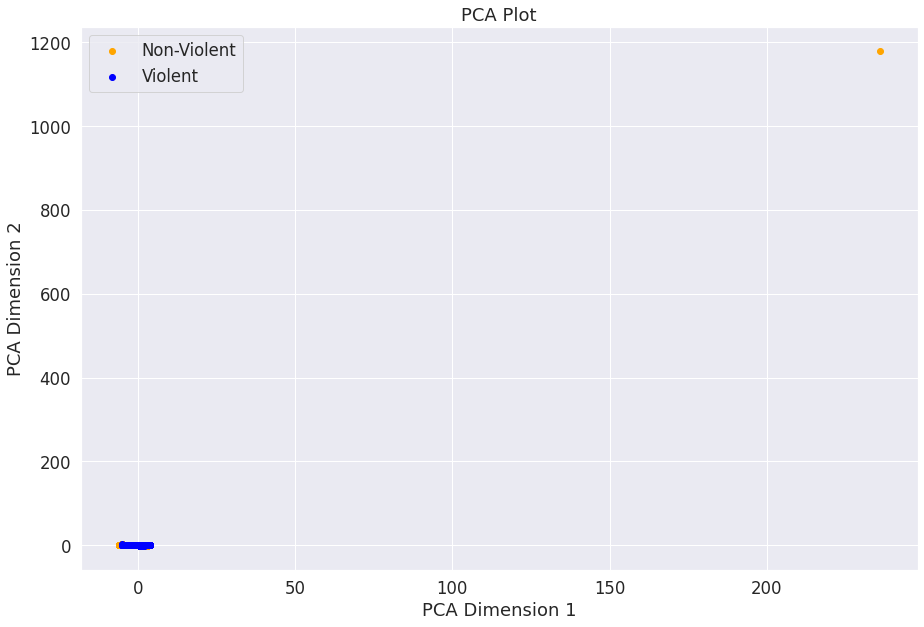

In [27]:
colors = ['orange','blue']
label_text = ["Non-Violent", "Violent"]

fig, ax = plt.subplots(figsize=(15,10))

for violence_level in [0,1]:
    cur_df = pca_Z_train[y_train==violence_level]
    ax =plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[violence_level], label=label_text[violence_level])

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Plot")
plt.legend();

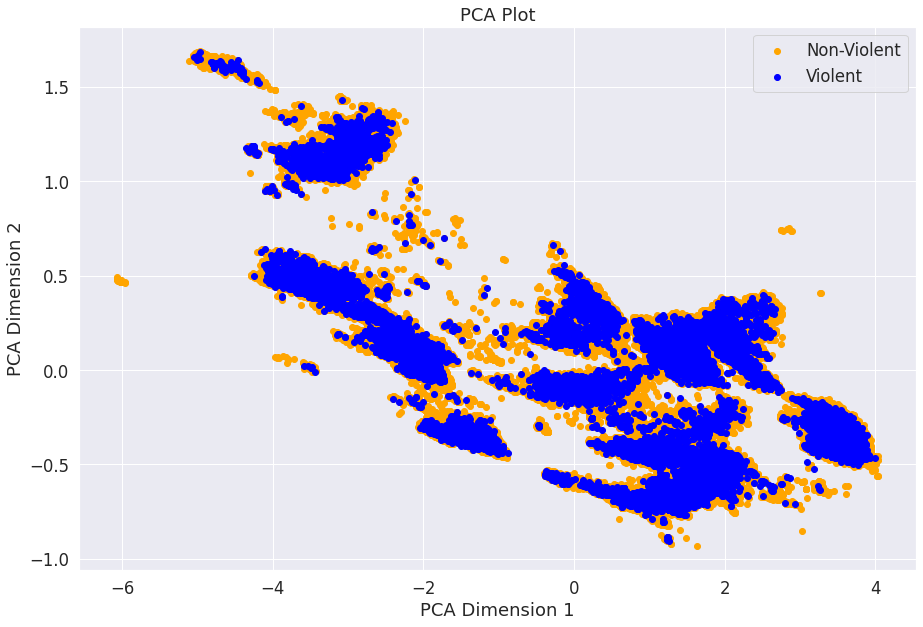

In [28]:
#Remove apparent outlier in data and plot again
outlier_filter = (pca_Z_train[:,0] < 50) & (pca_Z_train[:,1]  < 50)
pca_Z_train_filter = pca_Z_train[outlier_filter]
y_train_filter = y_train[outlier_filter]

colors = ['orange','blue']
label_text = ["Non-Violent", "Violent"]

fig, ax = plt.subplots(figsize=(15,10))

for violence_level in [0,1]:
    cur_df = pca_Z_train_filter[y_train_filter==violence_level]
    ax =plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[violence_level], label=label_text[violence_level])

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Plot")
plt.legend();



Significant overlap in data classification helps to explain why this is difficult to beat the baseline

# **Violent Crime Modeling - Combined Data (Boston/New York City)**

## **Logistic Regression**


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# we'll now evaluate for violent crime in using both cities using all features (minus the other response variable for Offense Type)
demog_category_columns = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']
train_crime_demog_dummies_df = pd.get_dummies(comb_crime_train.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)
test_crime_demog_dummies_df = pd.get_dummies(comb_crime_test.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)

# select all columns from dummies minus response, Geohash, Latitude, Longitude 
x_columns = train_crime_demog_dummies_df.drop(columns=["VIOLENT_CRIME","GEOHASH","LATITUDE","LONGITUDE","AREA"]).columns

X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]

demog_scaler = MinMaxScaler()
demog_scaler.fit(X_train)
x_train_norm = demog_scaler.transform(X_train)
x_test_norm = demog_scaler.transform(X_test)

y_train = train_crime_demog_dummies_df['VIOLENT_CRIME'].values
y_test = test_crime_demog_dummies_df['VIOLENT_CRIME'].values

# attempt a baseline logistic regression without regularization
demog_logit_full = LogisticRegression(penalty='none', max_iter = 10000)
demog_logit_full.fit(x_train_norm,y_train)
demog_logit_full_train_accuracy = round(demog_logit_full.score(x_train_norm, y_train),3)
demog_logit_full_test_accuracy = round(demog_logit_full.score(x_test_norm, y_test),3)

In [30]:
b0 = round(demog_logit_full.intercept_[0],3)
print(f"Logistic Regression Estimated Betas (B0): {b0}")

for i, k in enumerate(x_columns):
    print(f"Logistic Regression Estimated Beta {k} (B{i + 1}): { round(demog_logit_full.coef_[0][i],3)}")

print(f"\nLogisitic Train Accuracy: {demog_logit_full_train_accuracy}, Logistic Test Accuracy: {demog_logit_full_test_accuracy}")

Logistic Regression Estimated Betas (B0): -17.948
Logistic Regression Estimated Beta COVID_PERIOD (B1): -0.041
Logistic Regression Estimated Beta WHITE (B2): 20.983
Logistic Regression Estimated Beta BLACK (B3): 21.417
Logistic Regression Estimated Beta ASIAN (B4): 8.37
Logistic Regression Estimated Beta HISPANIC (B5): 15.681
Logistic Regression Estimated Beta MEDIAN_INCOME (B6): 0.198
Logistic Regression Estimated Beta LOCAL_PROP_VALUES (B7): -14.212
Logistic Regression Estimated Beta STREETLIGHT_DENSITY (B8): -0.929
Logistic Regression Estimated Beta POLICE_STATION_DISTANCE (B9): -6.407
Logistic Regression Estimated Beta HOSPITAL_DISTANCE (B10): -5.916
Logistic Regression Estimated Beta COLLEGE_UNIV_DISTANCE (B11): 0.235
Logistic Regression Estimated Beta ELECTION (B12): 0.067
Logistic Regression Estimated Beta PRCP (B13): -0.071
Logistic Regression Estimated Beta SNOW (B14): -0.791
Logistic Regression Estimated Beta NIGHT (B15): -0.64
Logistic Regression Estimated Beta YEAR_2015 (B1

## **Logistic Regression CV with Ridge Regularization**



In [31]:
from sklearn.linear_model import LogisticRegressionCV
c_list = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
folds = 3
training_score = []

logit_ridge= LogisticRegressionCV(Cs=c_list, penalty='l2',solver='liblinear', max_iter = 1000, scoring='accuracy',cv=folds)
logit_ridge.fit(x_train_norm, y_train)
logit_ridge_score_train = logit_ridge.score(x_train_norm, y_train)
logit_ridge_score_test = logit_ridge.score(x_test_norm, y_test)

In [32]:
print(
    "The regularization parameter C chosen by this model: {}\n"
    "Training Accuracy: {:.3f}\n"
    "Test Accuracy: {:.3f}\n"
    .format(logit_ridge.C_[0], logit_ridge_score_train, logit_ridge_score_test)
)

The regularization parameter C chosen by this model: 0.001
Training Accuracy: 0.882
Test Accuracy: 0.882



In [33]:
for i, k in enumerate(x_columns):
    print(f"Logistic Regression w/Ridge Estimated Beta {k} (B{i + 1}): { round(logit_ridge.coef_[0][i],3)}")

Logistic Regression w/Ridge Estimated Beta COVID_PERIOD (B1): 0.01
Logistic Regression w/Ridge Estimated Beta WHITE (B2): -0.739
Logistic Regression w/Ridge Estimated Beta BLACK (B3): -0.509
Logistic Regression w/Ridge Estimated Beta ASIAN (B4): 0.056
Logistic Regression w/Ridge Estimated Beta HISPANIC (B5): 0.073
Logistic Regression w/Ridge Estimated Beta MEDIAN_INCOME (B6): -0.23
Logistic Regression w/Ridge Estimated Beta LOCAL_PROP_VALUES (B7): -0.003
Logistic Regression w/Ridge Estimated Beta STREETLIGHT_DENSITY (B8): -0.543
Logistic Regression w/Ridge Estimated Beta POLICE_STATION_DISTANCE (B9): -0.001
Logistic Regression w/Ridge Estimated Beta HOSPITAL_DISTANCE (B10): -0.001
Logistic Regression w/Ridge Estimated Beta COLLEGE_UNIV_DISTANCE (B11): 0.099
Logistic Regression w/Ridge Estimated Beta ELECTION (B12): 0.038
Logistic Regression w/Ridge Estimated Beta PRCP (B13): -0.064
Logistic Regression w/Ridge Estimated Beta SNOW (B14): -0.053
Logistic Regression w/Ridge Estimated Beta 

## **Logistic Regression (Balanced Class Weight)**

In [34]:
# Balancing weight of the LR
demog_logit_balanced = LogisticRegression(penalty='none', max_iter = 10000, class_weight="balanced")
demog_logit_balanced.fit(x_train_norm,y_train)
demog_logit_balanced_train_accuracy = round(demog_logit_balanced.score(x_train_norm, y_train),3)
demog_logit_balanced_test_accuracy = round(demog_logit_balanced.score(x_test_norm, y_test),3)

In [35]:
b0 = round(demog_logit_balanced.intercept_[0],3)
print(f"Logistic Regression Estimated Betas (B0): {b0}")

for i, k in enumerate(x_columns):
    print(f"Logistic Regression Estimated Beta {k} (B{i + 1}): { round(demog_logit_balanced.coef_[0][i],3)}")

print(f"\nLogisitic Train Accuracy: {demog_logit_balanced_train_accuracy}, Logistic Test Accuracy: {demog_logit_balanced_test_accuracy}")

Logistic Regression Estimated Betas (B0): -13.609
Logistic Regression Estimated Beta COVID_PERIOD (B1): -0.024
Logistic Regression Estimated Beta WHITE (B2): 17.151
Logistic Regression Estimated Beta BLACK (B3): 17.717
Logistic Regression Estimated Beta ASIAN (B4): 7.14
Logistic Regression Estimated Beta HISPANIC (B5): 13.092
Logistic Regression Estimated Beta MEDIAN_INCOME (B6): 0.213
Logistic Regression Estimated Beta LOCAL_PROP_VALUES (B7): -9.381
Logistic Regression Estimated Beta STREETLIGHT_DENSITY (B8): -1.285
Logistic Regression Estimated Beta POLICE_STATION_DISTANCE (B9): -1011.925
Logistic Regression Estimated Beta HOSPITAL_DISTANCE (B10): -957.858
Logistic Regression Estimated Beta COLLEGE_UNIV_DISTANCE (B11): 1.174
Logistic Regression Estimated Beta ELECTION (B12): 0.381
Logistic Regression Estimated Beta PRCP (B13): -0.067
Logistic Regression Estimated Beta SNOW (B14): -0.737
Logistic Regression Estimated Beta NIGHT (B15): -0.366
Logistic Regression Estimated Beta YEAR_201

##**Principal Compoonent Analysis - Combined Data Predictor Analysis**

In [36]:
ss = StandardScaler().fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

pca_standard = PCA().fit(Z_train)
pca_Z_train = pca_standard.transform(Z_train)
pca_Z_test = pca_standard.transform(Z_test)

print(f"PCA Training Z Shape{pca_Z_train.shape}")
print(f"PCA Test Z Shape{pca_Z_test.shape}")

PCA Training Z Shape(638447, 64)
PCA Test Z Shape(159612, 64)


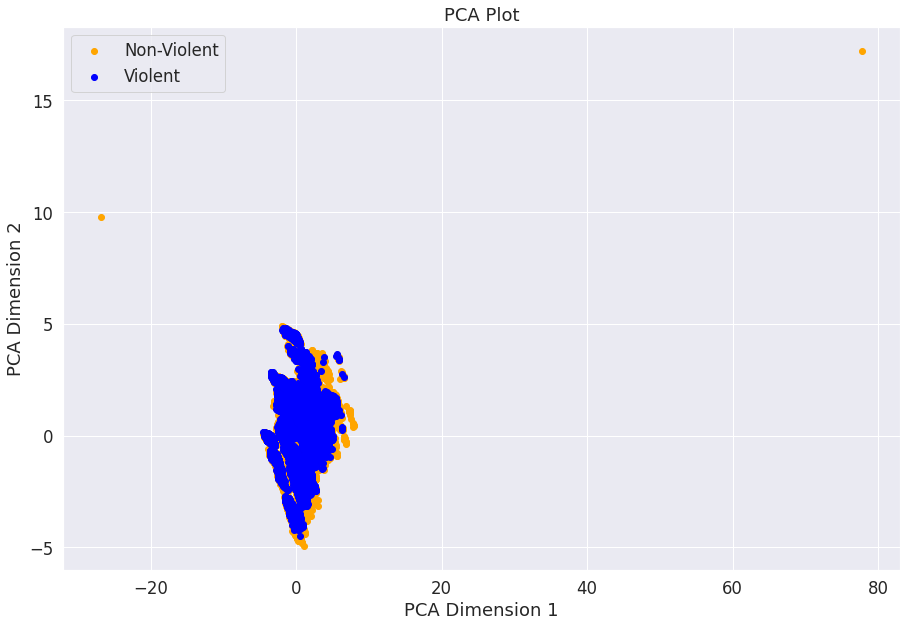

In [37]:
colors = ['orange','blue']
label_text = ["Non-Violent", "Violent"]

fig, ax = plt.subplots(figsize=(15,10))

for violence_level in [0,1]:
    cur_df = pca_Z_train[y_train==violence_level]
    ax =plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[violence_level], label=label_text[violence_level])

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Plot")
plt.legend();

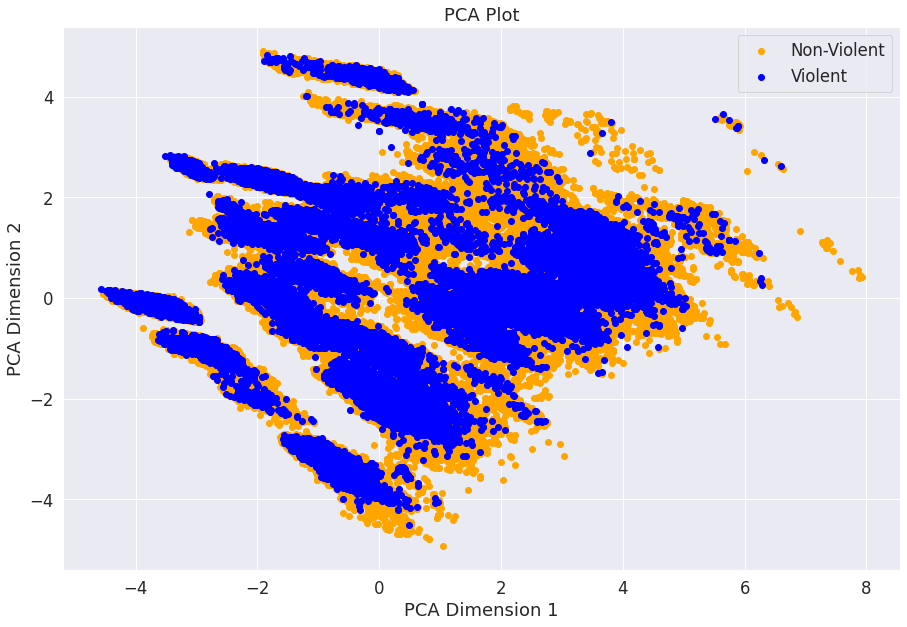

In [38]:
outlier_filter = (pca_Z_train[:,0] > -20) & (pca_Z_train[:,0]  < 60)
pca_Z_train_filter = pca_Z_train[outlier_filter]
y_train_filter = y_train[outlier_filter]

colors = ['orange','blue']
label_text = ["Non-Violent", "Violent"]

fig, ax = plt.subplots(figsize=(15,10))

for violence_level in [0,1]:
    cur_df = pca_Z_train_filter[y_train_filter==violence_level]
    ax =plt.scatter(cur_df[:,0], cur_df[:,1], c = colors[violence_level], label=label_text[violence_level])

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Plot")
plt.legend();


Combined dataset also exhibits overlap as in the boston dataset. There are some areas of clearer distinction but still appears challenging to predict

#**Offense Type Prediction - Boston Data**

## **Logistic Regression**


In [39]:
# Offense Type Logistic Regression
# we'll predict Offense Types in Boston using all features (minus the other response variable for Offense Type)
demog_category_columns = ['AREA', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']
train_crime_demog_dummies_df = pd.get_dummies(boston_crime_train.drop(columns=["OFFENSE_TYPE","VIOLENT_CRIME","GEOHASH"]), columns=demog_category_columns)
test_crime_demog_dummies_df = pd.get_dummies(boston_crime_test.drop(columns=["OFFENSE_TYPE","VIOLENT_CRIME","GEOHASH"]), columns=demog_category_columns)

# select all columns from dummies minus response and Geohash 
x_columns = train_crime_demog_dummies_df.columns

X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]

demog_scaler = MinMaxScaler()
demog_scaler.fit(X_train)
x_train_norm = demog_scaler.transform(X_train)
x_test_norm = demog_scaler.transform(X_test)

y_train = boston_crime_train['OFFENSE_TYPE'].values
y_test = boston_crime_test['OFFENSE_TYPE'].values

# attempt a baseline logistic regression without regularization
demog_logit_full = LogisticRegression(penalty='none', max_iter = 10000)
demog_logit_full.fit(x_train_norm,y_train)
demog_logit_full_train_accuracy = round(demog_logit_full.score(x_train_norm, y_train),3)
demog_logit_full_test_accuracy = round(demog_logit_full.score(x_test_norm, y_test),3)


In [40]:
print(f"\nLogisitic Train Accuracy: {demog_logit_full_train_accuracy}, Logistic Test Accuracy: {demog_logit_full_test_accuracy}")


Logisitic Train Accuracy: 0.451, Logistic Test Accuracy: 0.451


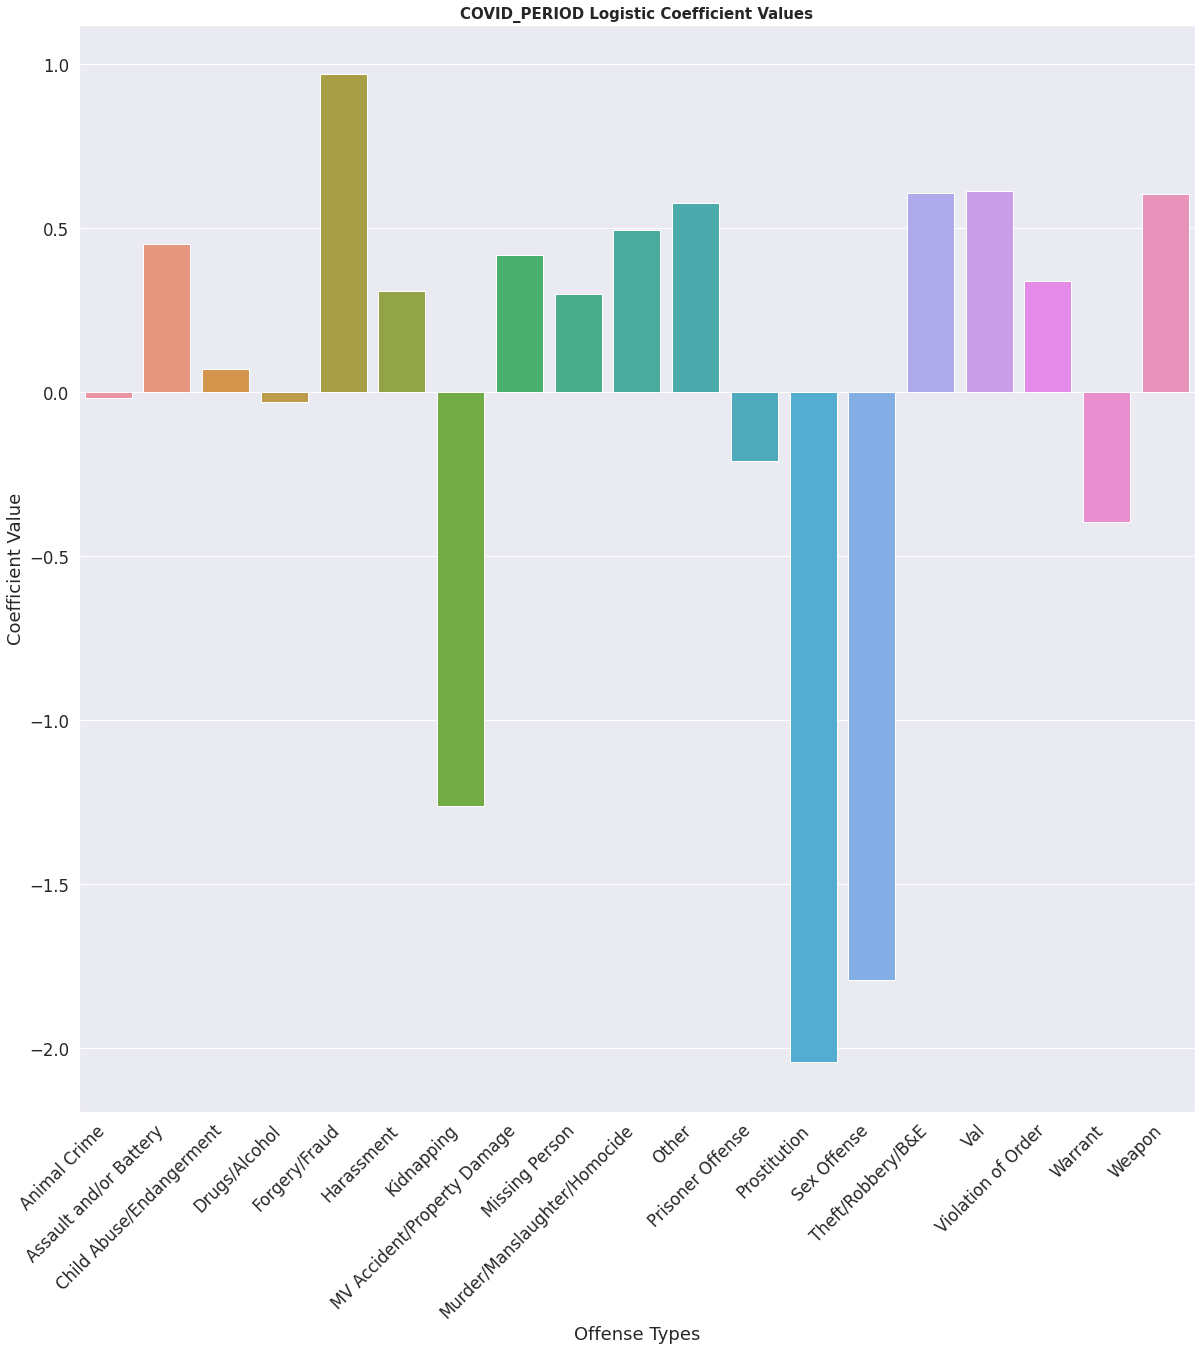

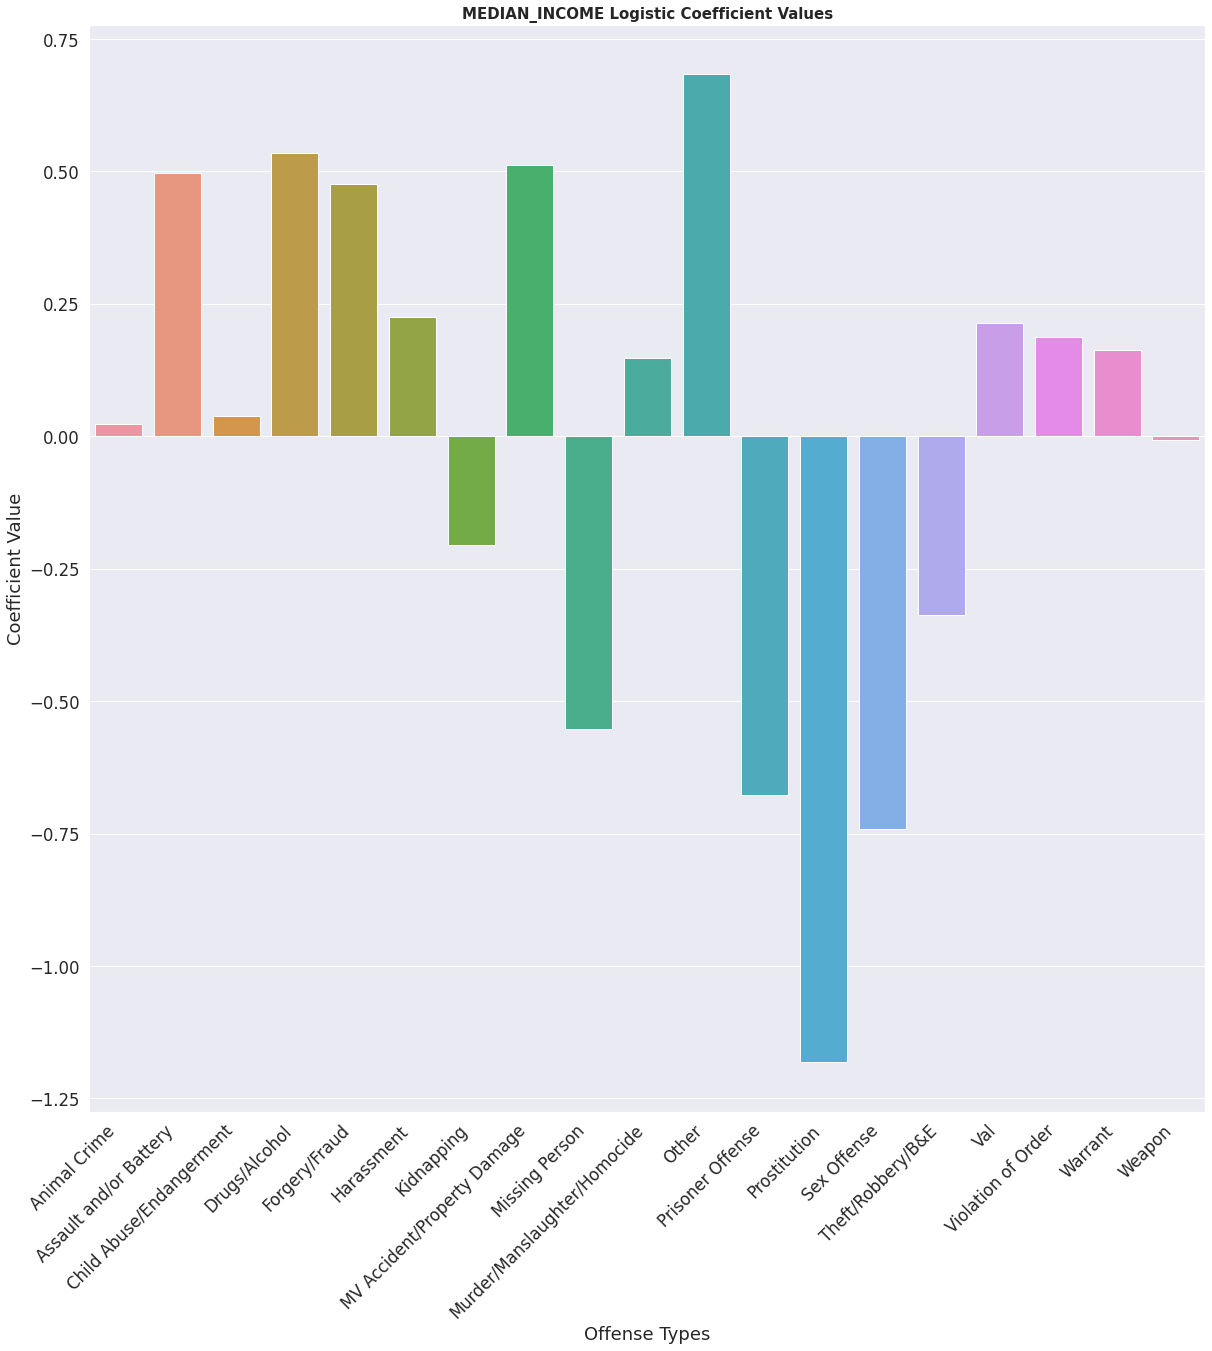

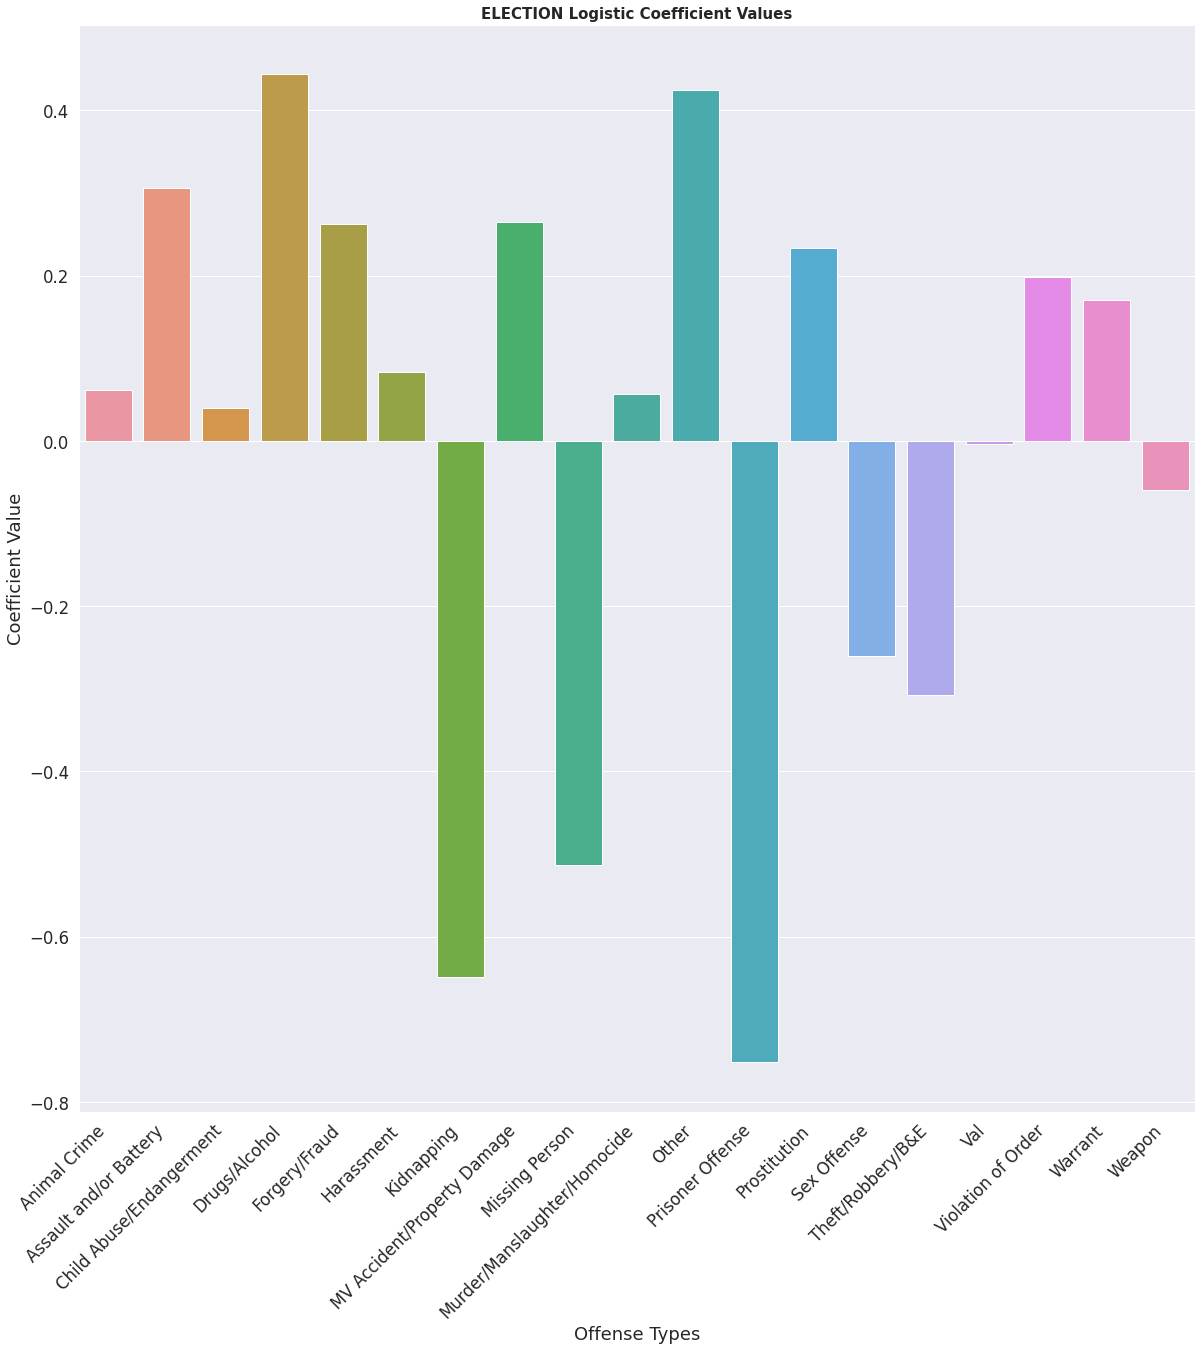

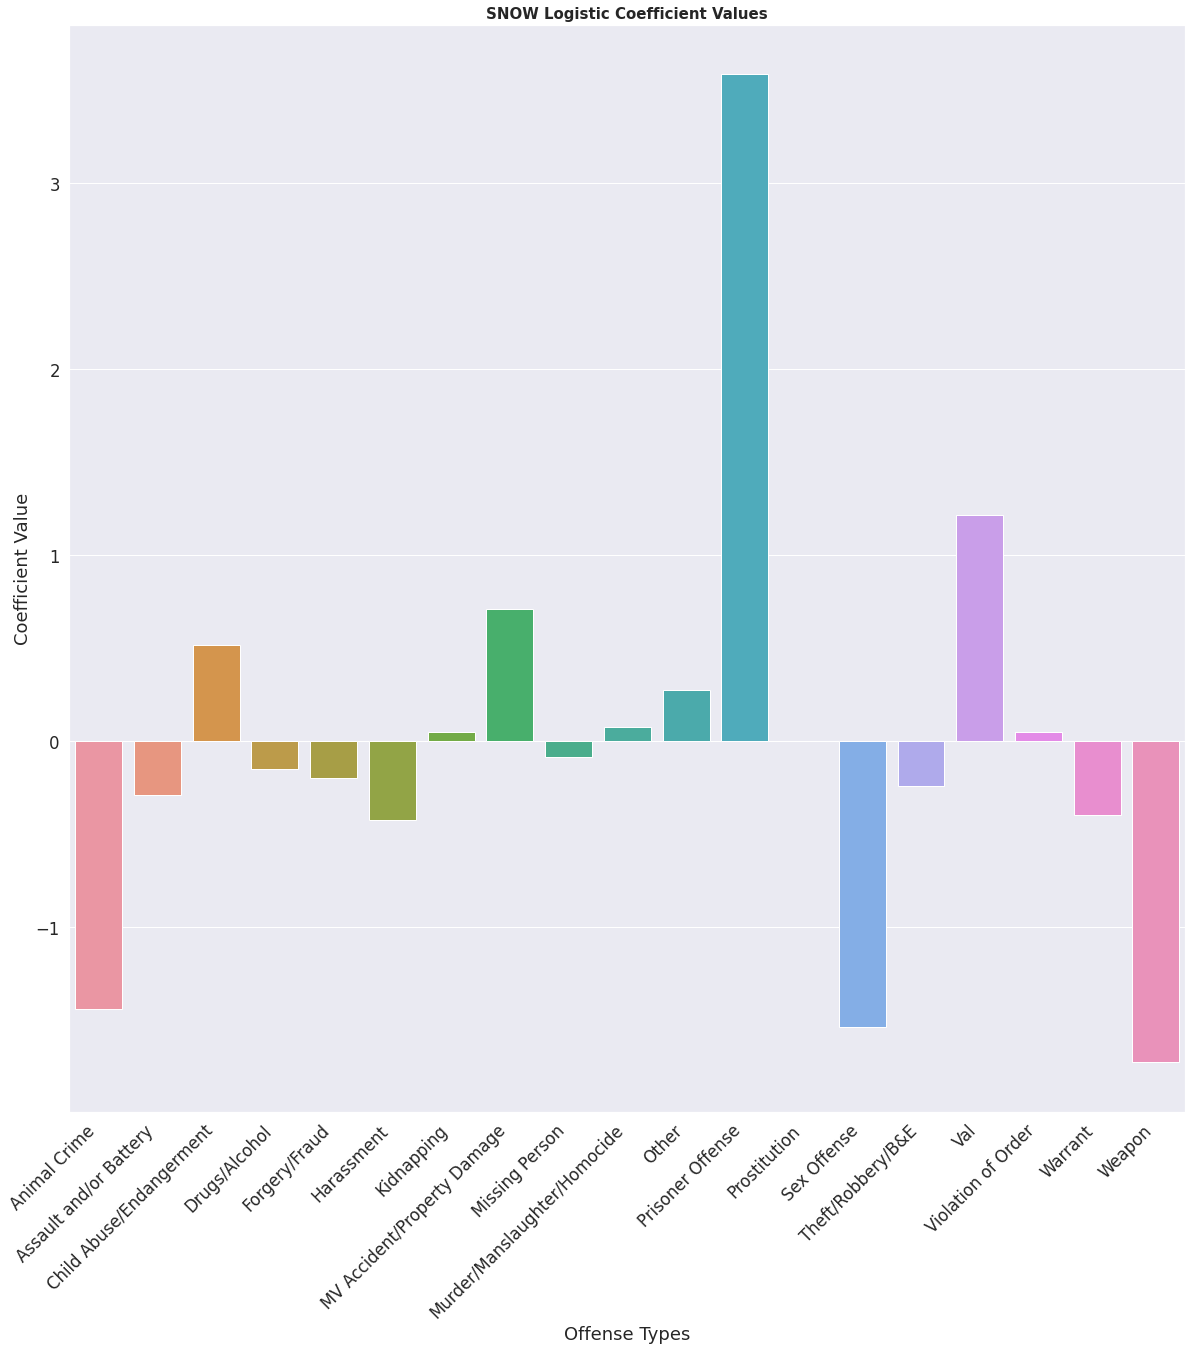

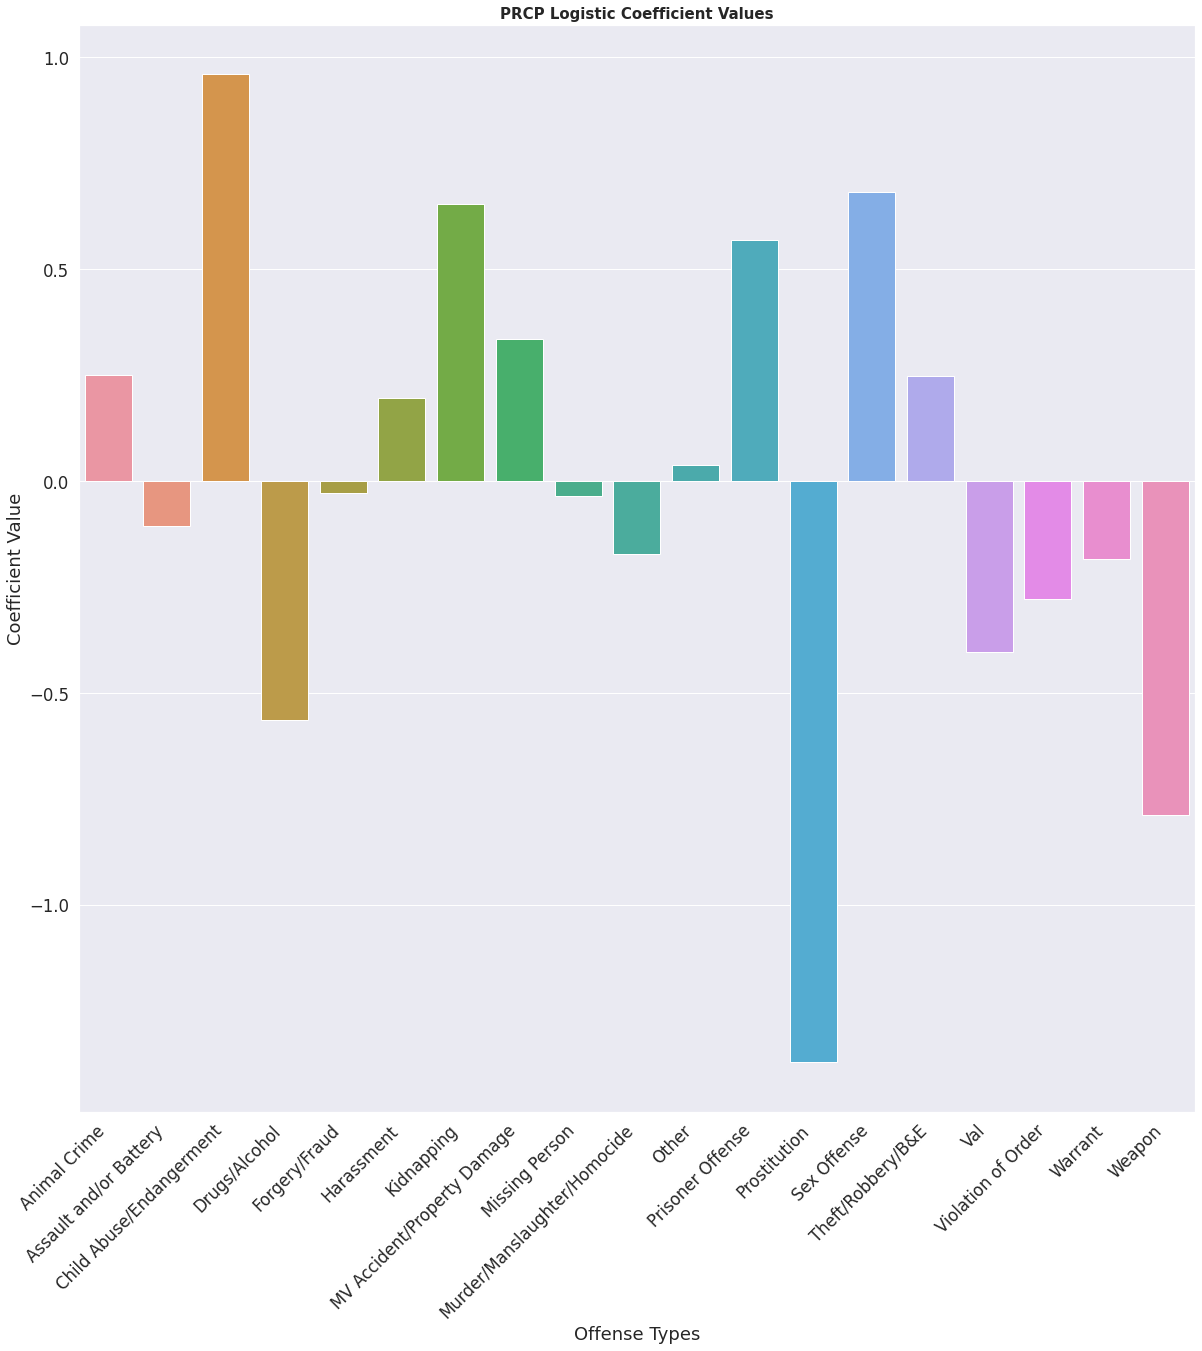

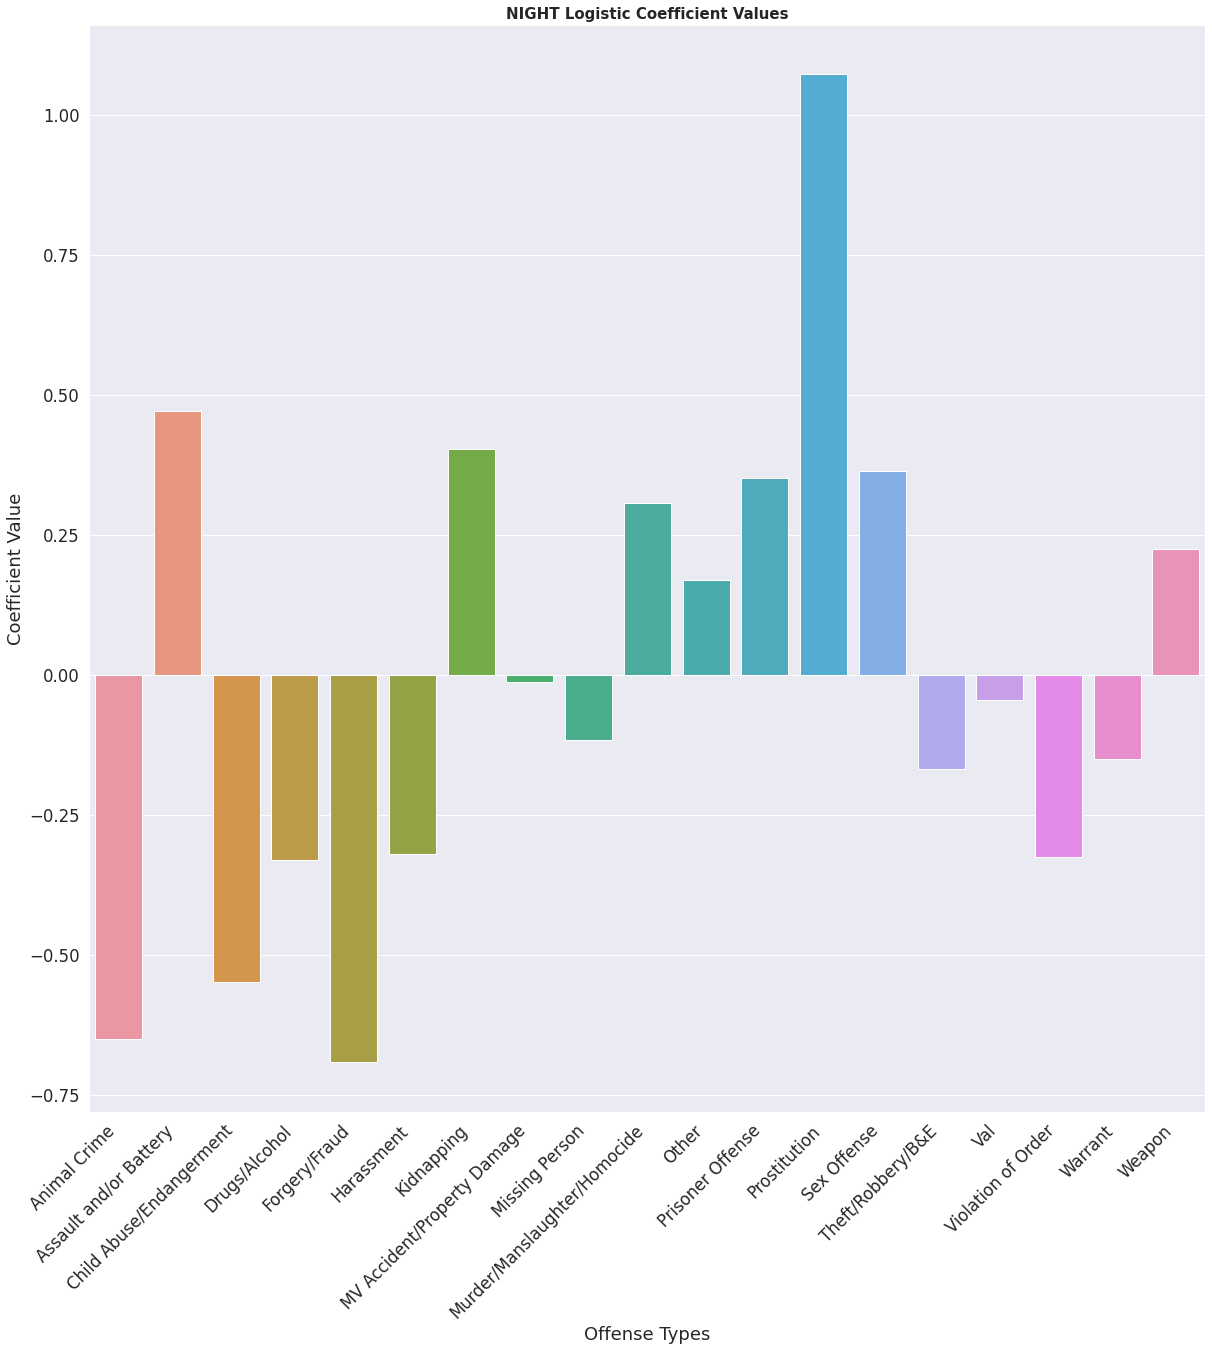

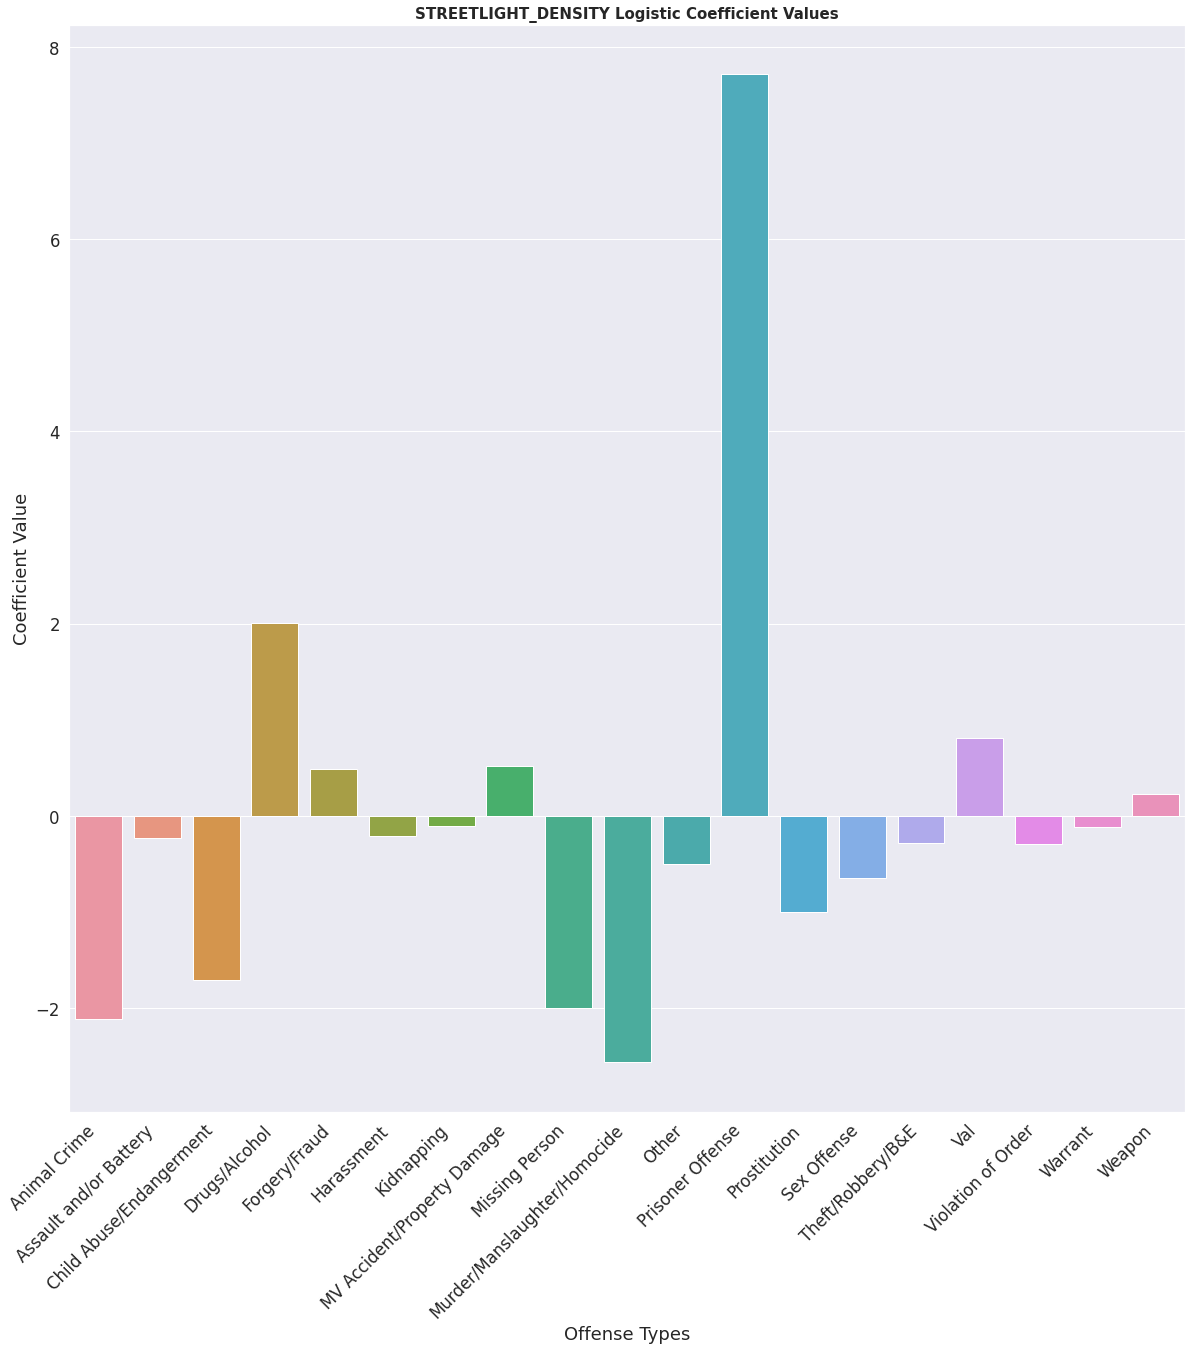

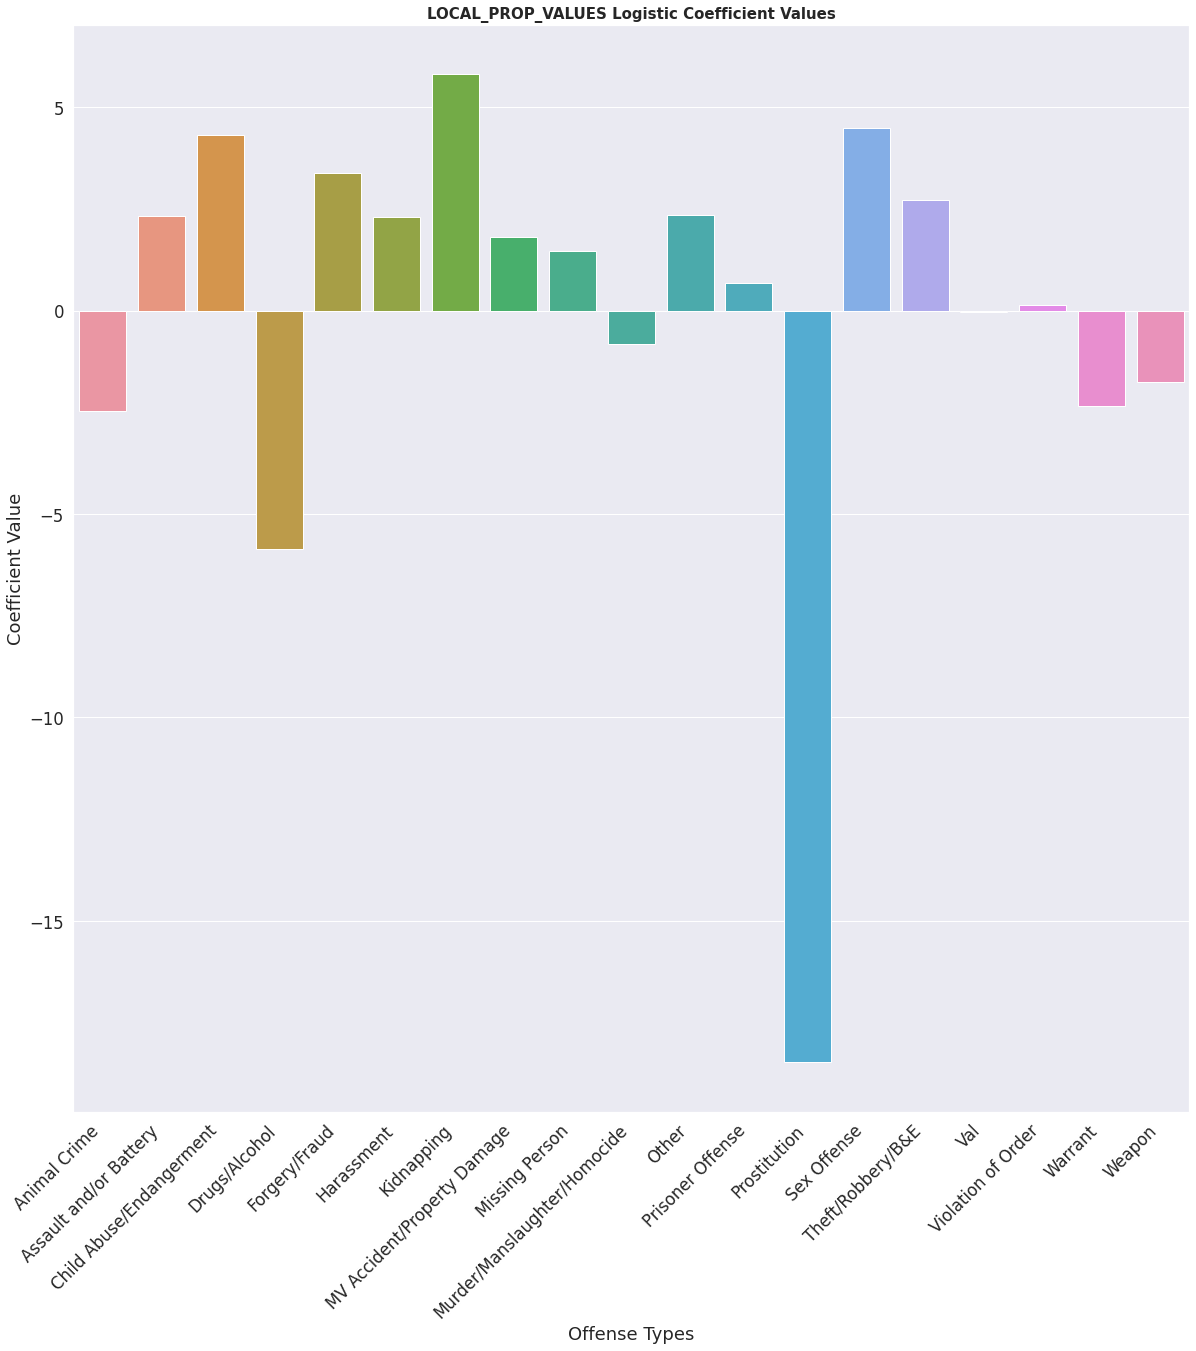

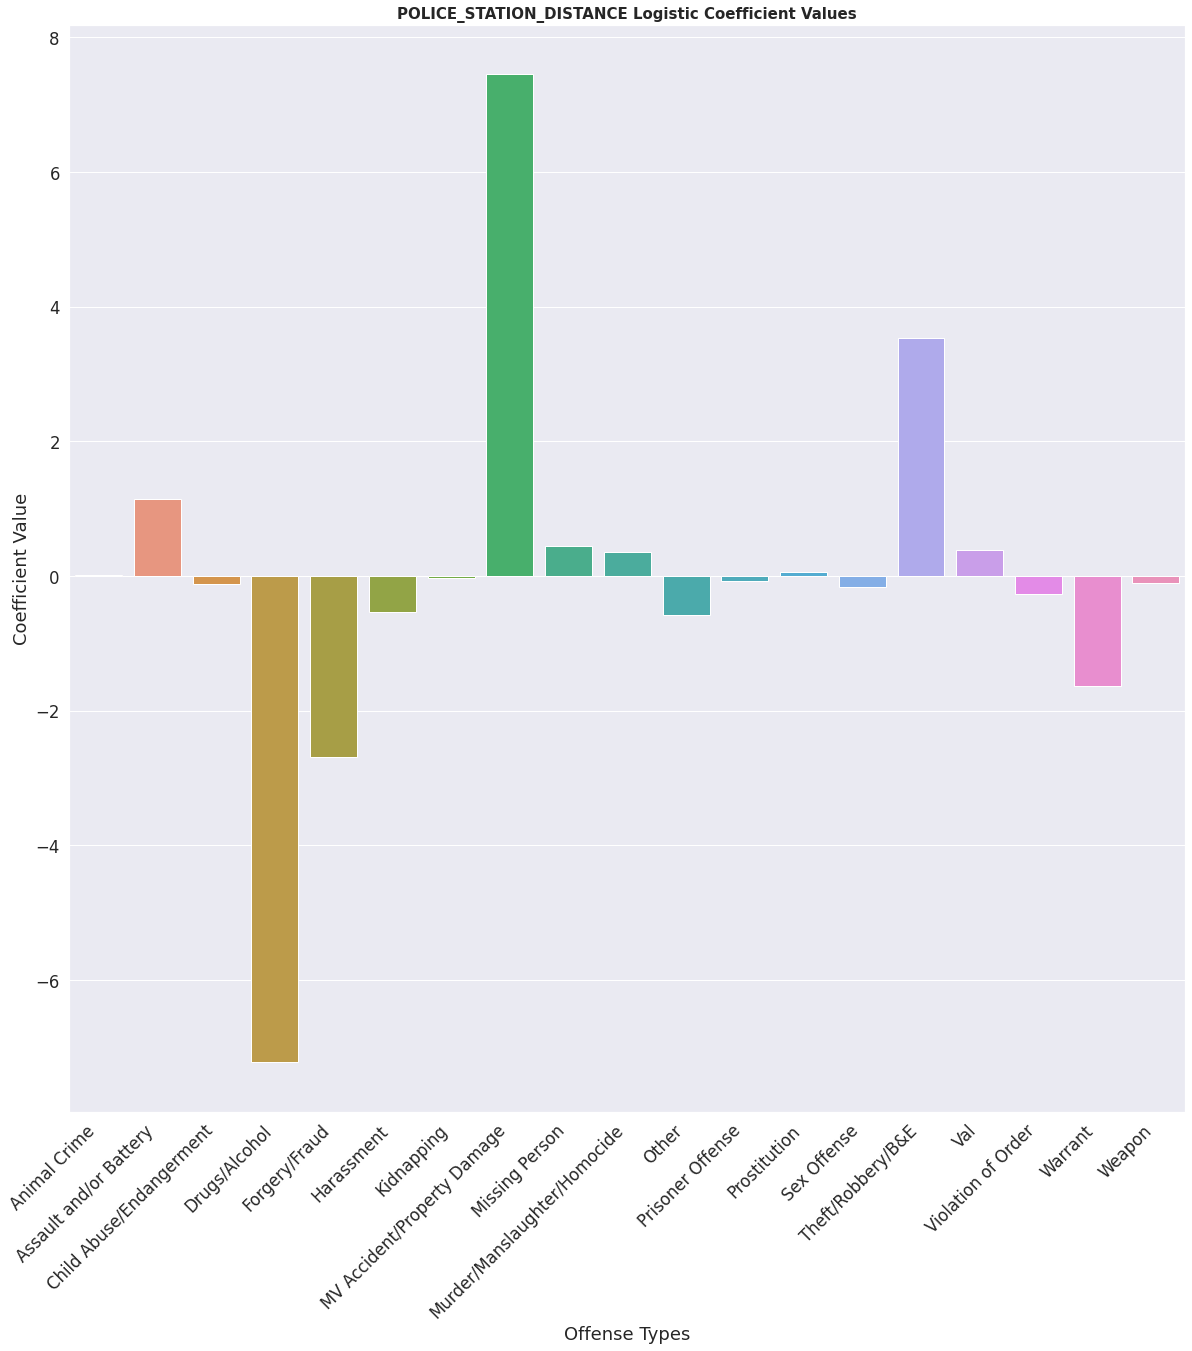

In [41]:
# Graph coefficent for each predicted value per feature
coeffs = {}

for i, k in enumerate(x_columns): 
    x = []
    y = []
    for j, classification in enumerate(demog_logit_full.classes_):
      x.append(classification)
      y.append(round(demog_logit_full.coef_[j][i],3))
    coeffs[k] = {"x": x, "y":y}  

for i, k in enumerate(["COVID_PERIOD","MEDIAN_INCOME","ELECTION","SNOW","PRCP","NIGHT","STREETLIGHT_DENSITY","LOCAL_PROP_VALUES","POLICE_STATION_DISTANCE"]):
  fig, ax = plt.subplots(figsize=(20,20))
  sns.barplot(x=coeffs[k]["x"], y=coeffs[k]["y"],ax=ax)
  ax.set_title(f"{k} Logistic Coefficient Values", fontdict={ 'weight' : 'bold','size': 15})
  ax.set_ylabel("Coefficient Value")
  ax.set_xlabel("Offense Types")
  ax.set_xticklabels(coeffs[k]["x"], rotation = 45, ha="right")
  plt.show()

##**Principal Component Analysis - Offense Type Predictor Analysis**

In [42]:
ss = StandardScaler().fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

pca_standard = PCA().fit(Z_train)
pca_Z_train = pca_standard.transform(Z_train)
pca_Z_test = pca_standard.transform(Z_test)

print(f"PCA Training Z Shape{pca_Z_train.shape}")
print(f"PCA Test Z Shape{pca_Z_test.shape}")

PCA Training Z Shape(393416, 78)
PCA Test Z Shape(98355, 78)


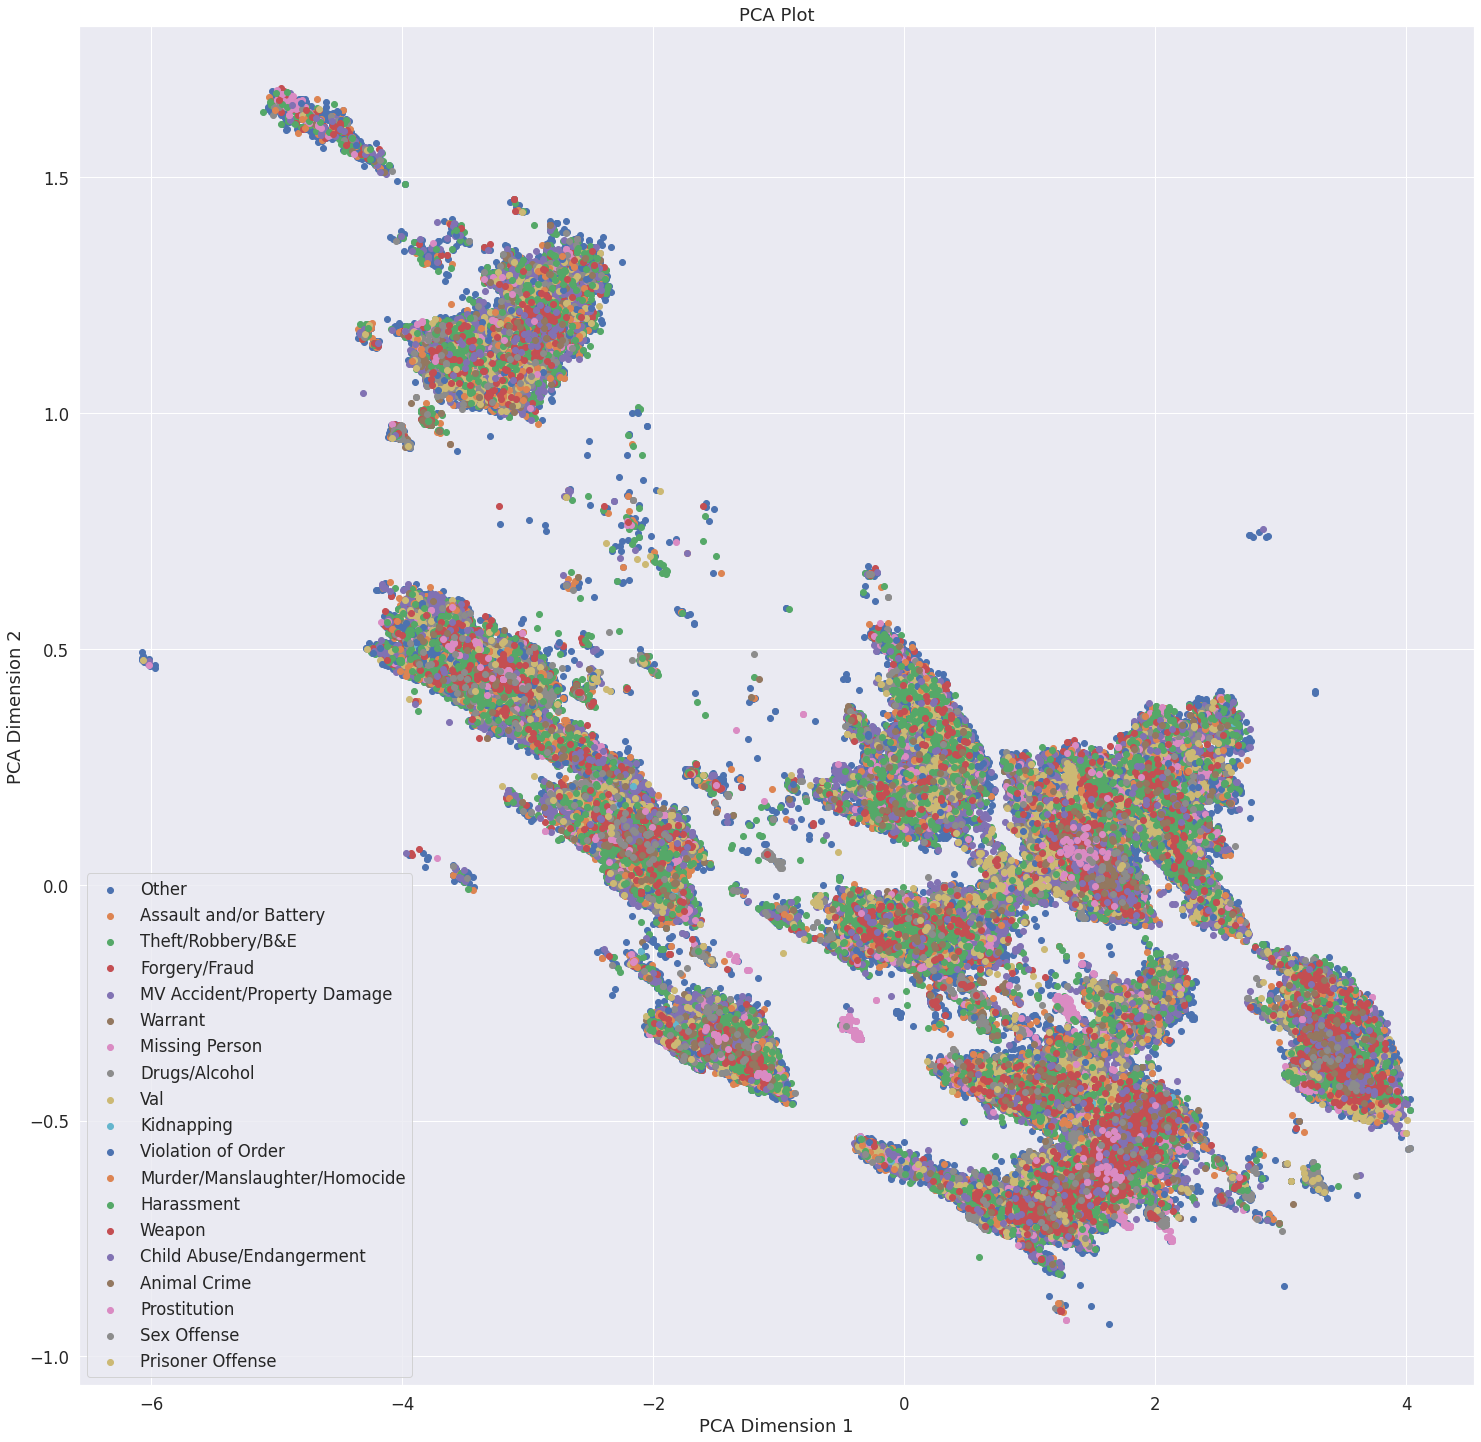

In [45]:
outlier_filter = (pca_Z_train[:,0] < 50) & (pca_Z_train[:,1]  < 50)
y_train_types = boston_crime_train['OFFENSE_TYPE'].values
y_train_types_filter = y_train_types[outlier_filter]
pca_Z_train_filter = pca_Z_train[outlier_filter]

label_text = boston_crime_train['OFFENSE_TYPE'].unique()
colors = ['orange','blue']
fig, ax = plt.subplots(figsize=(25,25))

for i, offense_type in enumerate(label_text):
    cur_df = pca_Z_train_filter[y_train_types_filter==offense_type]
    ax =plt.scatter(x=cur_df[:,0], y=cur_df[:,1], label=label_text[i])

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Plot")
plt.legend();
plt.show()

#**AdaBoost Model - Violent Crime Prediction**

##**Boston Violent Crime**

In [46]:
# Let's give adaboost a shot
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def adaboost(depth, num_estimators, learning_rate, X_train, y_train, X_test, y_test):
    boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = depth), n_estimators=num_estimators, learning_rate=learning_rate)
    boost.fit(X_train, y_train)
    train_staged_score = list(boost.staged_score(X_train, y_train))
    test_staged_score = list(boost.staged_score(X_test, y_test))
    return train_staged_score, test_staged_score


In [47]:
# we'll evaluate for violent crime in Boston using all features (minus the other response variable for Offense Type)
demog_category_columns = ['AREA', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']
train_crime_demog_dummies_df = pd.get_dummies(boston_crime_train.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)
test_crime_demog_dummies_df = pd.get_dummies(boston_crime_test.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)

# select all columns from dummies minus response and Geohash 
x_columns = train_crime_demog_dummies_df.drop(columns=["VIOLENT_CRIME","GEOHASH"]).columns
X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]
y_train = train_crime_demog_dummies_df['VIOLENT_CRIME'].values
y_test = test_crime_demog_dummies_df['VIOLENT_CRIME'].values

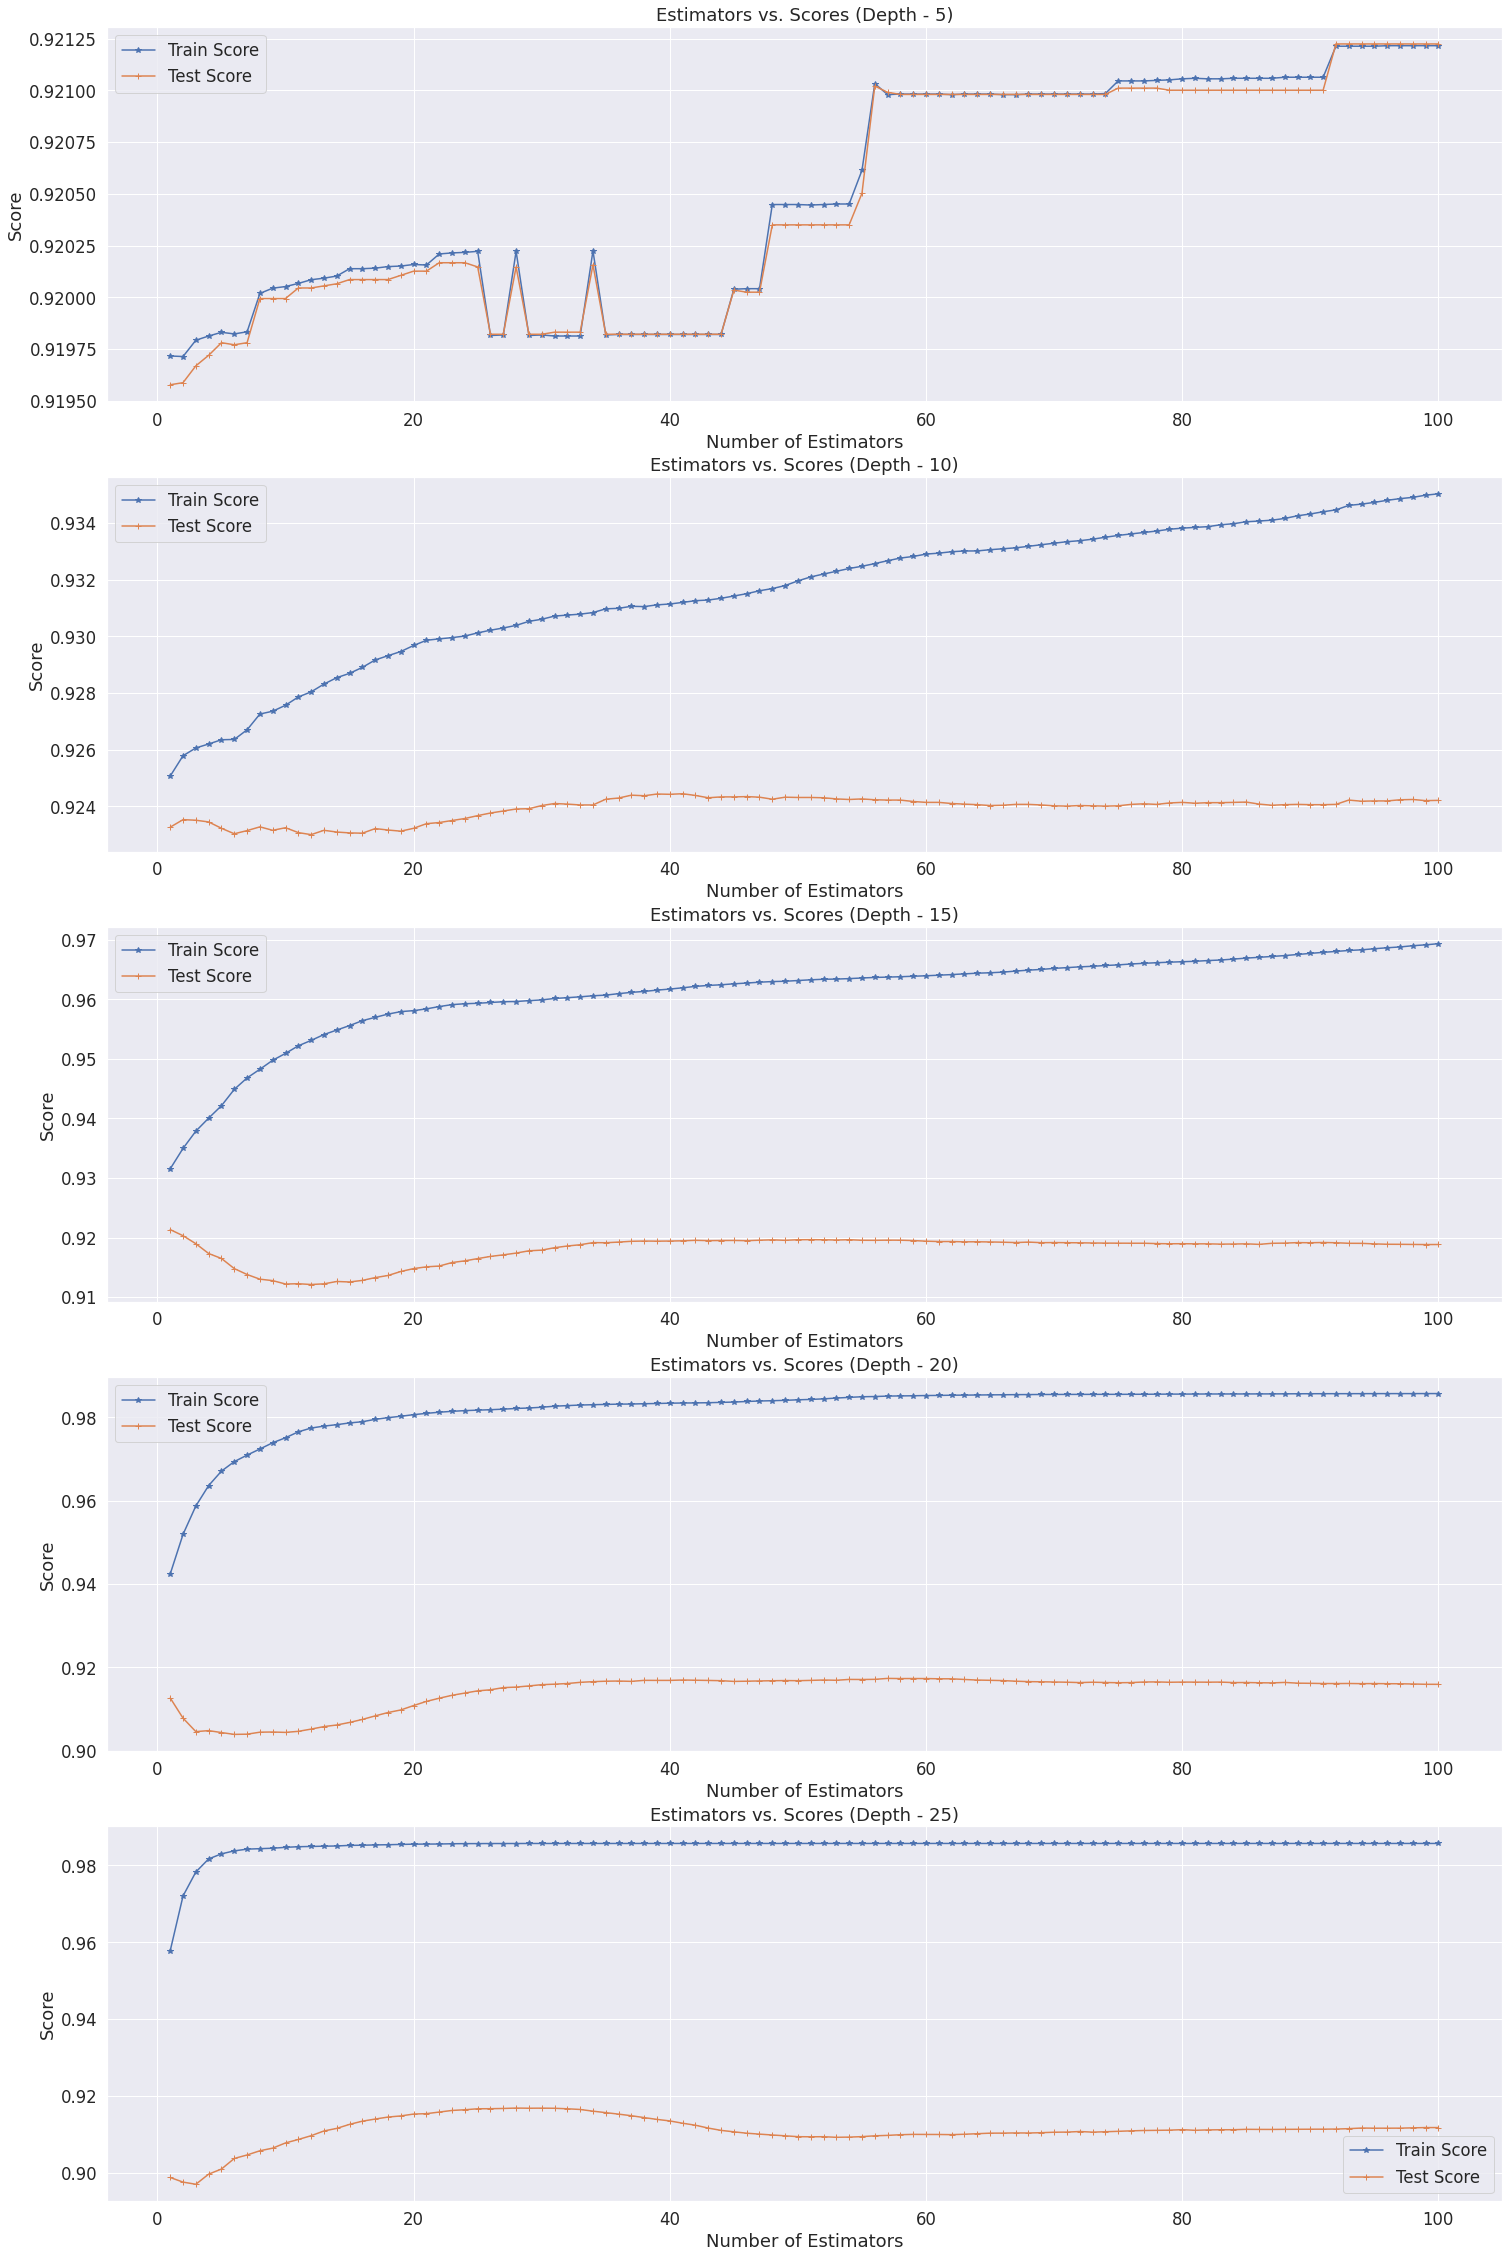

In [48]:
depths = [5,10,15,20,25]
n_estimators = 100
learning_rate = .05
num_estimators = range(1, 101)
fig, axs = plt.subplots(nrows=len(depths),ncols=1,figsize=(25,40))
score_gap = []
best_score = []
best_iteration = []

for i, depth in enumerate(depths):
    train, test = adaboost(depth,n_estimators,learning_rate, X_train, y_train, X_test, y_test)
    max_idx = np.argmax(test)
    best_score.append(test[max_idx])
    best_iteration.append(max_idx)
    score_gap.append(np.abs(train[max_idx] - test[max_idx]))
    axs[i].plot(num_estimators, train, '*-', label="Train Score")
    axs[i].plot(num_estimators, test, '-+', label="Test Score")
    axs[i].legend()
    axs[i].set_title(f"Estimators vs. Scores (Depth - {depth})")
    axs[i].set_ylabel("Score")
    axs[i].set_xlabel("Number of Estimators")  

In [49]:
boost_depth_performance = {'depths': depths, 'best test score': best_score, 'train-test delta':score_gap, 'iteration': best_iteration}
pd.DataFrame.from_dict(boost_depth_performance).set_index('depths')

best test score  train-test delta  iteration
depths                                              
5              0.921224          0.000011         91
10             0.924447          0.006753         40
15             0.921326          0.010215          0
20             0.917320          0.067780         56
25             0.916852          0.068845         27

The best test score is a depth of 10 however the model with the smallest difference between train-test is with a depth of 5.

##**Combined (Boston/NYC) Violent Crime Prediction**

In [50]:
# we'll now evaluate for violent crime in using both cities using all features (minus the other response variable for Offense Type)
demog_category_columns = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']
train_crime_demog_dummies_df = pd.get_dummies(comb_crime_train.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)
test_crime_demog_dummies_df = pd.get_dummies(comb_crime_test.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)

# select all columns from dummies minus response, Geohash, Latitude, Longitude 
x_columns = train_crime_demog_dummies_df.drop(columns=["VIOLENT_CRIME","GEOHASH","LATITUDE","LONGITUDE","AREA"]).columns

X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]
y_train = train_crime_demog_dummies_df['VIOLENT_CRIME'].values
y_test = test_crime_demog_dummies_df['VIOLENT_CRIME'].values


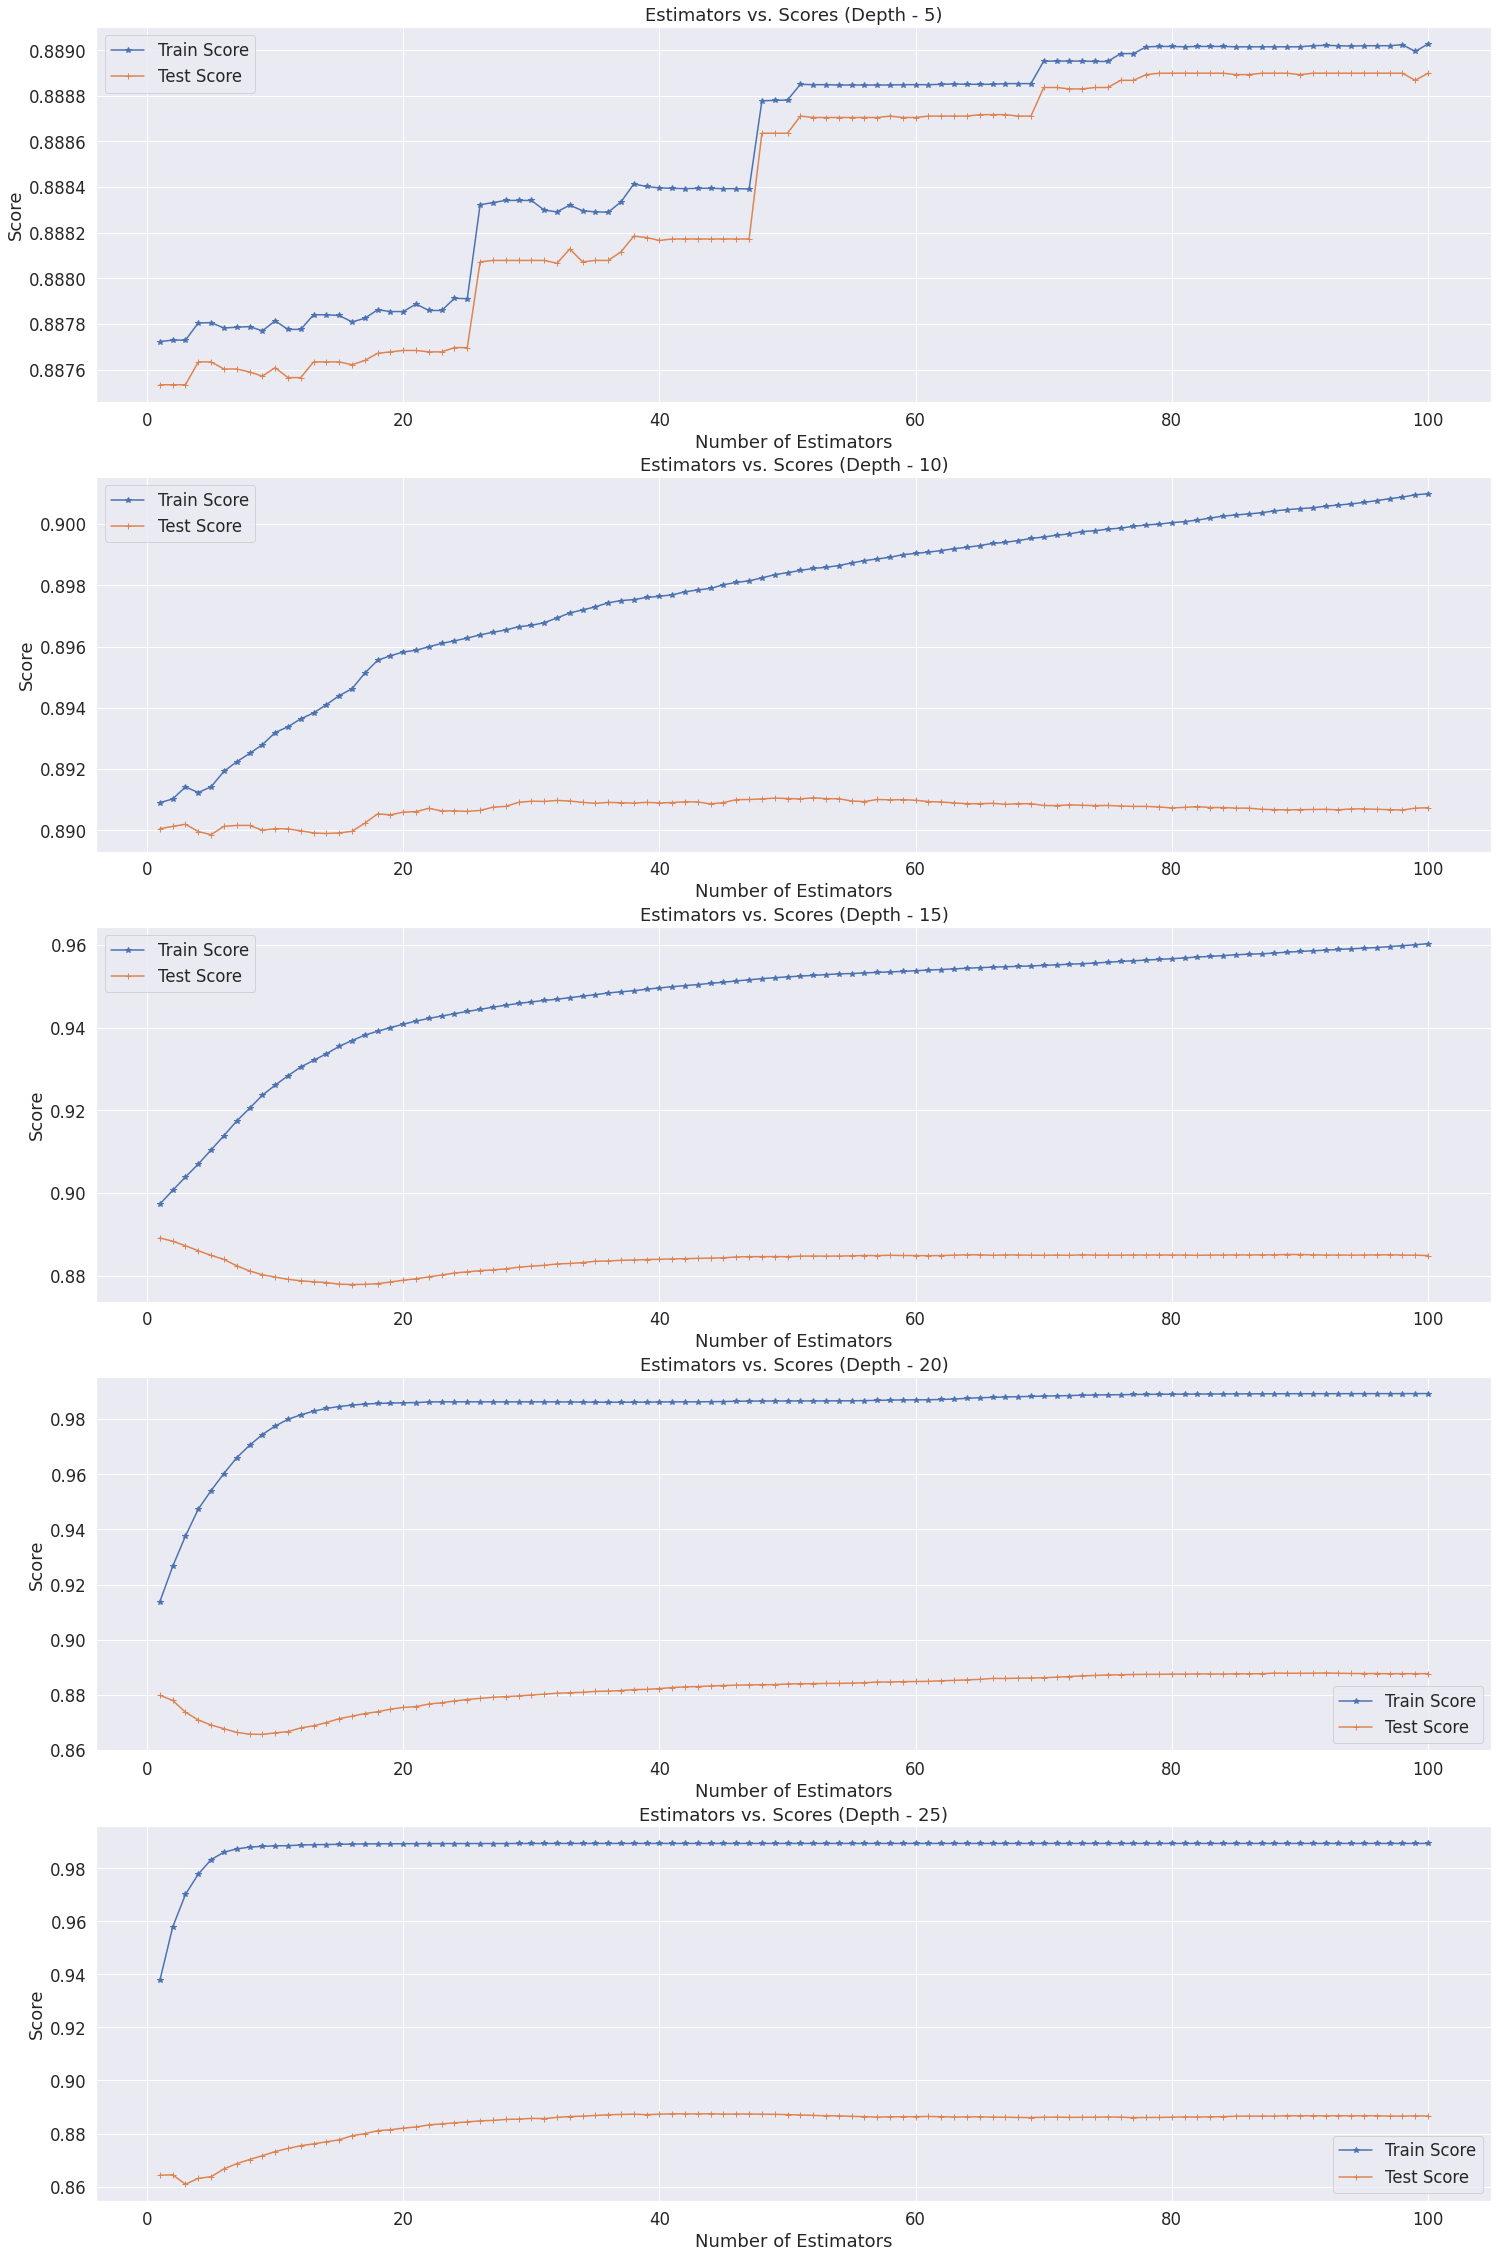

In [51]:
depths = [5,10,15,20,25]
n_estimators = 100
learning_rate = .05
num_estimators = range(1, 101)
fig, axs = plt.subplots(nrows=len(depths),ncols=1,figsize=(25,40))
score_gap = []
best_score = []
best_iteration = []

for i, depth in enumerate(depths):
    train, test = adaboost(depth,n_estimators,learning_rate,X_train, y_train, X_test, y_test)
    max_idx = np.argmax(test)
    best_score.append(test[max_idx])
    best_iteration.append(max_idx)
    score_gap.append(np.abs(train[max_idx] - test[max_idx]))
    axs[i].plot(num_estimators, train, '*-', label="Train Score")
    axs[i].plot(num_estimators, test, '-+', label="Test Score")
    axs[i].legend()
    axs[i].set_title(f"Estimators vs. Scores (Depth - {depth})")
    axs[i].set_ylabel("Score")
    axs[i].set_xlabel("Number of Estimators")  

In [52]:
boost_depth_performance = {'depths': depths, 'best test score': best_score, 'train-test delta':score_gap, 'iteration': best_iteration}
pd.DataFrame.from_dict(boost_depth_performance).set_index('depths')

best test score  train-test delta  iteration
depths                                              
5              0.888899          0.000117         78
10             0.891067          0.007482         51
15             0.889144          0.008207          0
20             0.887941          0.101280         91
25             0.887465          0.101903         43

The best test score is a depth of 10 however the model with the smallest difference between train-test is with a depth of 5.